In [1]:
!pip install -U augly
!apt-get install python3-magic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-magic is already the newest version (2:0.4.15-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [2]:
#!pip install Keras==2.2.4
#from importlib import reload  
import autoreload
%load_ext autoreload
%autoreload 2
#import loader
#reload(loader)
#from loader.fb_image_gen import *

In [3]:
''' Simple triplet based similarity training;
Simple: using a simple model with dense layers and few conv2d only
ref:https://github.com/Ekeany/Siamese-Network-with-Triplet-Loss/blob/master/MachinePart1.ipynb
#requires keras 2.2.5(cityscape env)
'''
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#from args import get_arguments
import argparse
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from pathlib import Path

import time
from datetime import datetime

In [4]:
import tensorflow
print(tensorflow.__version__)#has to be 2.6 version

2.6.0


In [5]:
!apt-get install libomp-dev
#!pip install --upgrade faiss==1.7.1
!pip install faiss-cpu==1.7.1
import faiss
print( faiss.__version__)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libomp5
Suggested packages:
  libomp-doc
The following NEW packages will be installed:
  libomp-dev libomp5
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 239 kB of archives.
After this operation, 804 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libomp5 amd64 5.0.1-1 [234 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libomp-dev amd64 5.0.1-1 [5,088 B]
Fetched 239 kB in 1s (238 kB/s)
Selecting previously unselected package libomp5:amd64.
(Reading database ... 155079 files and directories currently installed.)
Preparing to unpack .../libomp5_5.0.1-1_amd64.deb ...
Unpacking libomp5:amd64 (5.0.1-1) ...
Selecting previously unselected package libomp-dev.
Preparing to unpack .../libomp-dev_5.0.1-1_amd64.deb ...
Unpacking libomp-dev (5.0.1-

In [6]:
!pip install albumentations==1.0.3
import albumentations as A
print(A.__version__)

     |████████████████████████████████| 98 kB 5.6 MB/s 
     |████████████████████████████████| 37.1 MB 92 kB/s 
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12
1.0.3


In [7]:
#@title Default title text
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!cp -a /content/drive/MyDrive/collab_drive/isc2021-dev/. /content/

In [9]:
import os
if os.path.exists('/content/data/query.zip'):
  print("query.zip already exists; skip download and unzip")
else:
  print("starting to copy and unzip")
  !mkdir ./data
  !mkdir ./data/image
  !mkdir ./data/embed
  !cp /content/drive/MyDrive/collab_drive/isc-data/reference.zip /content/data/reference.zip
  !cp /content/drive/MyDrive/collab_drive/isc-data/query.zip /content/data/query.zip
  !unzip -qq data/reference.zip -d data/image
  !unzip -qq data/query.zip -d data/image

starting to copy and unzip


In [10]:

import autoreload
%load_ext autoreload
%autoreload 2
from utils import *
import os
from settings import * # importing all the variables and Cosntants
from getmodel import *

from importlib import reload  
from triplet_hardlibtf import *
from getmodel import *
print(get_model_name())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
  found 4991 images
  found 4991 images
model name: deeprank
deeprank


In [11]:
def save_models_weights(suffix=''):
  modelname = 'models/weights/'+ get_model_name()+"_complete_"+suffix+".hdf5"
  basemodelname = 'models/weights/'+ get_model_name()+"_base_"+suffix+".hdf5"
  model.save_weights(modelname)
  base_model.save_weights(basemodelname)
  print("basemodelname = ", basemodelname)
  #!cp ./models/weights/*.hdf5 /content/drive/MyDrive/collab_drive/model_artifacts-dev-tf
  !cp $basemodelname /content/drive/MyDrive/collab_drive/model_artifacts-dev-tf
  !cp $modelname /content/drive/MyDrive/collab_drive/model_artifacts-dev-tf
  print("saved model weights and copied to google drive")
#save_models_weights()

def save_code():
  #!cp -a ./models/weights/ /content/drive/MyDrive/collab_drive/model_artifacts
  #!cp -a ./models/logs/ /content/drive/MyDrive/collab_drive/model_artifacts

  !cp /content/*.py /content/drive/MyDrive/collab_drive/isc2021-dev/
  !cp /content/models/*.py /content/drive/MyDrive/collab_drive/isc2021-dev/models/
  !cp /content/loader/*.py /content/drive/MyDrive/collab_drive/isc2021-dev/loader/
  !cp /content/isc/*.py /content/drive/MyDrive/collab_drive/isc2021-dev/isc/
#save_code()
#!cp /content/*.p /content/drive/MyDrive/collab_drive/model_artifacts/

ipimg:  (160, 160, 3) uint8 255 33
outimg:  (160, 160, 3) uint8 255 127


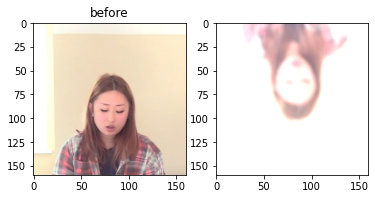

In [12]:
%matplotlib inline
from augument import *
import matplotlib.pyplot as plt
from augument import apply_aug_internal
#from loader.fb_image_gen_pre_tf import read_image
ipimg = read_image(R_List[0])
plt.subplot(1,2,1)
plt.imshow(ipimg)
plt.title("before")
#A.Resize()
#outimg = apply_aug_internal(ipimg, 4)
outimg = get_augument_image_internal(ipimg)
#3 choice needs work, #6,4 needs shape
print("ipimg: ", ipimg.shape, ipimg.dtype, np.max(ipimg), np.min(ipimg))
print("outimg: ",outimg.shape, outimg.dtype, np.max(outimg), np.min(outimg))
plt.subplot(1,2,2)
plt.imshow(outimg)

In [ ]:
base_cnn = tf.keras.applications.ResNet50(weights="imagenet", input_shape=IM_SIZE + (3,), include_top=False)
base1 = embedding_model1(base_cnn)
base1.summary()

Model: "Embedding1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 166, 166, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 80, 80, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 80, 80, 64)   256         conv1_conv[0][0]                 
_________________________________________________________________________________________

In [ ]:
#tf.keras.preprocessing.image.smart_resize(size=(imsize/2,imsize/2))
#tf.keras.layers.

base2 = embedding_model2(base_cnn.input)
base2.shape

x shape: (None, 3, 3, 96)


TensorShape([None, 864])

In [ ]:
base3 = embedding_model3(base_cnn.input)
base3.shape

x shape: (None, 5, 5, 96)


TensorShape([None, 864])

In [ ]:
from getmodel import *
#save_code()
print(get_model_name())
base_model = embedding_model(freezeFirstHead=False)
base_model.summary()
model = complete_model(base_model)
model.summary()


deeprank
x shape: (None, 3, 3, 96)
x shape: (None, 5, 5, 96)
Model: "Embedding"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 166, 166, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 80, 80, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 80, 80, 64)   256         conv1_conv[0][0]                 
_____________________________

In [13]:

#!mkdir ./data/image
gen_results = True
!cp /content/drive/MyDrive/collab_drive/isc-data/im_subset_ref.zip /content/data/
!cp /content/drive/MyDrive/collab_drive/isc-data/im_subset_query.zip /content/data/
!cp /content/drive/MyDrive/collab_drive/isc-data/image_dev_queries.zip /content/data/
if gen_results==False:
  !cp /content/drive/MyDrive/collab_drive/isc-data/image_extended_Ref.zip /content/data/
  !unzip -qq ./data/image_extended_Ref.zip -d data/image/
  #!cp /content/drive/MyDrive/collab_drive/isc-data/mergedRefExtended0_2_chunk100_cont.hdf5 /content/data/image
  !cp /content/drive/MyDrive/collab_drive/isc-data/image_train_0_chunk100.zip /content/data/
  !unzip -qq ./data/image_train_0_chunk100.zip -d data/image/
else:
  !cp /content/drive/MyDrive/collab_drive/isc-data/image_full_ref*.hdf5 /content/data/image
#canot use zipped hdf5 as they are corrupt while uploading to gdrive
#!unzip ./data/im_hdf5.zip -d data/image/
#im_hdf5.zip will have following files(im_subset_query.hdf5,im_subset_query.hdf5, im_Dev_queries, im_ref_extended)

In [14]:
!unzip -qq ./data/im_subset_ref.zip -d data/image/
!unzip -qq ./data/im_subset_query.zip   -d data/image/
!unzip -qq ./data/image_dev_queries.zip -d data/image/

In [15]:
!rm -f ./data/*.zip 

Inside: generate_triplets_hdfseq: total seq data= 500


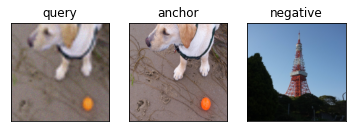

In [ ]:
test_generator = generate_triplets_train_hdfseq(start=0, stop=50000, batch_sz=100, forcePrep = False)
data = next(test_generator)
plot_triplets_batch(data, numTriplets=1)

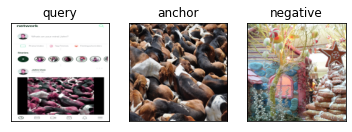

In [ ]:
plot_triplets_batch(data,start=13)


**Import files and libraries**

In [ ]:
#import tensorflow as tf
#from tensorflow.keras.optimizers import
#tf.keras.applications.resnet50

In [ ]:
#from keras.optimizers  import Adam
#keras.optimizers.Adam
base_model = embedding_model()
testgen = generate_triplets(BATCH_SIZE=16)
data = next(testgen )
[A, P, N], label = data
xq = np.squeeze(base_model.predict(A))
xb = np.squeeze(base_model.predict(P))
print(xq.shape)
d=xq.shape[-1]#dimension of embeddings
index = faiss.IndexFlatL2(d)
index.add(xb)
D, I = index.search(xq, 2) # search top 2
print("matching index before training....")
print(I)
print(D)
getMatchingScore(I, 1)

In [16]:
from getmodel import *
#!cp /content/drive/MyDrive/collab_drive/model_artifacts-dev-tf/resnet50tf_base_GOLD5_1.hdf5 ./models/weights/
!cp /content/drive/MyDrive/collab_drive/model_artifacts-dev-tf/deeprank_base_GOLD21.hdf5 ./models/weights/
!cp /content/drive/MyDrive/collab_drive/model_artifacts-dev-tf/OFF_Embeddings_deeprank_best.hdf5 ./models/weights/

base_model = embedding_model()
#model = complete_model(base_model)
#base_model.load_weights('models/weights/'+get_model_name()+"_base.hdf5")
#base_model.load_weights('models/weights/resnet50tf_base_89P_GOLD1.hdf5')
base_model.load_weights('models/weights/deeprank_base_GOLD21.hdf5')
print(get_model_name())
#base_model = embedding_model(freezeFirstHead=True,firstHeadWt='models/weights/resnet50tf_base_GOLD5_1.hdf5')
model = complete_model(base_model)
#model.save_weights('models/weights/resnet50tf_complete_final_89P_GOLD1.hdf5')
I1 = findAccuracy(base_model)
#generate_full_QueryEmbeddings(base_model)#new baseline 89Precision, 4751 accurate

94781440/94765736 [==============================] - 1s 0us/step
x shape: (None, 3, 3, 96)
x shape: (None, 5, 5, 96)
deeprank
not using triplet_loss_improved
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:16<00:00,  2.02it/s]


Time for generation 1.2770659049352011 mins
embedding array shape: (4960, 4096)
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:16<00:00,  2.02it/s]


Time for generation 1.2799132585525512 mins
embedding array shape: (4960, 4096)
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 98.24596774193549% : 
I[0:5 [[0]
 [1]
 [2]
 [3]
 [4]]
D[0:5 [[0.1654743 ]
 [0.13629174]
 [0.40319693]
 [0.25956142]
 [0.31937218]]


  found 54878 images
Inference for generating embedding. THis will take long....


100%|██████████| 1097/1097 [03:42<00:00,  4.92it/s]


Time for generation 3.7148762941360474 mins
Writing embedding to file./data/embed/subset_refExtended_em_resnet50Reg.hdf5
  found 50000 images
Inference for generating embedding. THis will take long....


100%|██████████| 1000/1000 [03:23<00:00,  4.91it/s]


Time for generation 3.397738246122996 mins
Writing embedding to file./data/embed/full_query_em_resnet50Reg.hdf5
*******Total no of correct predictions:  4751
ntp at 9=10, 49=49,99=97, 499=484, 999=975,
 4999=4322,7999=4573, 9999=4634,11999=4675
probas_pred at 9=-0.0032805204391479492, 49=-0.01036679744720459,99=-0.014831900596618652, 499=-0.0286252498626709, 999=-0.03740894794464111,
 4999=-0.16956710815429688,7999=-0.27936697006225586, 9999=-0.32013440132141113,11999=-0.35463905334472656
precision at p[99]=0.97, p[499]=0.968,p[999]=0.975, p[4999]=0.8644,p[9999]=0.4634
recall at r[99]=0.01943498296934482, r[499]=0.0969745541975556,r[999]=0.19535163293929073, r[4999]=0.8659587257062713,r[9999]=0.9284712482468443
Average Precision: 0.89102
Recall at P90    : 0.85273
Threshold at P90 : -0.151055
Recall at rank 1:  0.95191
Recall at rank 10: 0.95191
*******Total no of correct predictions:  4751
*******Total no of incorrect predictions:  20249
*************Suggested accuracy from metrics ev

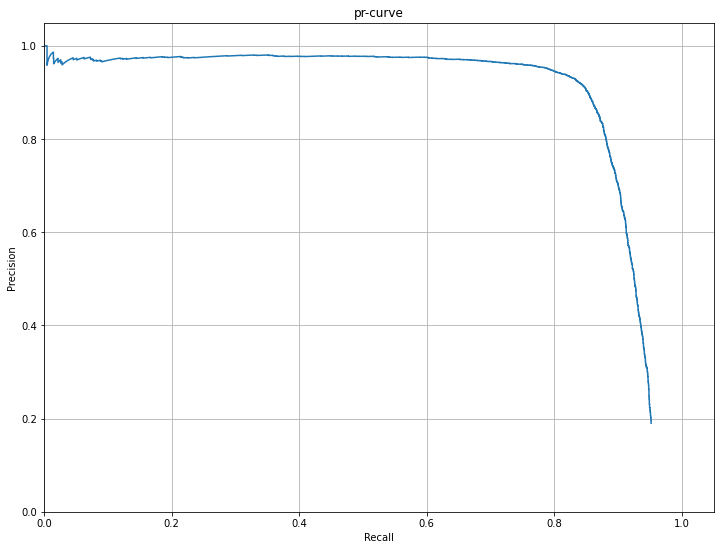

In [ ]:
generate_full_QueryEmbeddings(base_model)#new baseline 89Precision, 4751 accurate

  found 1000000 images
Total IDS: 1000000
iters 20
reading files from 0 to 50000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:46<00:00,  4.71it/s]


Time for generation 1.76831663052241 mins
Writing embedding to file./data/embed/full_ref_em_0resnet50tf.hdf5
reading files from 50000 to 100000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:45<00:00,  4.73it/s]


Time for generation 1.7624707500139871 mins
Writing embedding to file./data/embed/full_ref_em_1resnet50tf.hdf5
reading files from 100000 to 150000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:45<00:00,  4.72it/s]


Time for generation 1.764270023504893 mins
Writing embedding to file./data/embed/full_ref_em_2resnet50tf.hdf5
reading files from 150000 to 200000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:46<00:00,  4.70it/s]


Time for generation 1.771298587322235 mins
Writing embedding to file./data/embed/full_ref_em_3resnet50tf.hdf5
reading files from 200000 to 250000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:46<00:00,  4.71it/s]


Time for generation 1.770208517710368 mins
Writing embedding to file./data/embed/full_ref_em_4resnet50tf.hdf5
reading files from 250000 to 300000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:45<00:00,  4.73it/s]


Time for generation 1.7614532470703126 mins
Writing embedding to file./data/embed/full_ref_em_5resnet50tf.hdf5
reading files from 300000 to 350000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:45<00:00,  4.72it/s]


Time for generation 1.7664375225702922 mins
Writing embedding to file./data/embed/full_ref_em_6resnet50tf.hdf5
reading files from 350000 to 400000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:45<00:00,  4.72it/s]


Time for generation 1.7647342046101888 mins
Writing embedding to file./data/embed/full_ref_em_7resnet50tf.hdf5
reading files from 400000 to 450000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:46<00:00,  4.69it/s]


Time for generation 1.7752932151158651 mins
Writing embedding to file./data/embed/full_ref_em_8resnet50tf.hdf5
reading files from 450000 to 500000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:46<00:00,  4.69it/s]


Time for generation 1.7752566933631897 mins
Writing embedding to file./data/embed/full_ref_em_9resnet50tf.hdf5
reading files from 500000 to 550000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:46<00:00,  4.71it/s]


Time for generation 1.7675949017206827 mins
Writing embedding to file./data/embed/full_ref_em_10resnet50tf.hdf5
reading files from 550000 to 600000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:45<00:00,  4.73it/s]


Time for generation 1.7618901451428732 mins
Writing embedding to file./data/embed/full_ref_em_11resnet50tf.hdf5
reading files from 600000 to 650000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:46<00:00,  4.70it/s]


Time for generation 1.7722057859102884 mins
Writing embedding to file./data/embed/full_ref_em_12resnet50tf.hdf5
reading files from 650000 to 700000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:45<00:00,  4.72it/s]


Time for generation 1.763881802558899 mins
Writing embedding to file./data/embed/full_ref_em_13resnet50tf.hdf5
reading files from 700000 to 750000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:46<00:00,  4.71it/s]


Time for generation 1.7699326992034912 mins
Writing embedding to file./data/embed/full_ref_em_14resnet50tf.hdf5
reading files from 750000 to 800000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:45<00:00,  4.76it/s]


Time for generation 1.7522401332855224 mins
Writing embedding to file./data/embed/full_ref_em_15resnet50tf.hdf5
reading files from 800000 to 850000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:45<00:00,  4.72it/s]


Time for generation 1.7642457604408264 mins
Writing embedding to file./data/embed/full_ref_em_16resnet50tf.hdf5
reading files from 850000 to 900000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:45<00:00,  4.76it/s]


Time for generation 1.7521663308143616 mins
Writing embedding to file./data/embed/full_ref_em_17resnet50tf.hdf5
reading files from 900000 to 950000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:46<00:00,  4.71it/s]


Time for generation 1.7675678412119546 mins
Writing embedding to file./data/embed/full_ref_em_18resnet50tf.hdf5
reading files from 950000 to 1000000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:44<00:00,  4.77it/s]


Time for generation 1.7473768631617228 mins
Writing embedding to file./data/embed/full_ref_em_19resnet50tf.hdf5
  found 50000 images
Inference for generating embedding. THis will take long....


100%|██████████| 1000/1000 [02:12<00:00,  7.56it/s]


Time for generation 2.2058377981185915 mins
Writing embedding to file./data/embed/full_query_em_resnet50tf.hdf5
*******Total no of correct predictions:  4621
ntp at 9=10, 49=49,99=99, 499=498, 999=991,
 4999=3983,7999=4323, 9999=4398,11999=4457
probas_pred at 9=-0.0034029483795166016, 49=-0.011871933937072754,99=-0.017218708992004395, 499=-0.03398704528808594, 999=-0.04469764232635498,
 4999=-0.15234017372131348,7999=-0.2162569761276245, 9999=-0.24363958835601807,11999=-0.2692880630493164
precision at p[99]=0.99, p[499]=0.996,p[999]=0.991, p[4999]=0.7966,p[9999]=0.4398
recall at r[99]=0.019835704267681827, r[499]=0.09977960328591465,r[999]=0.1985574033259868, r[4999]=0.7980364656381487,r[9999]=0.8811861350430775
Average Precision: 0.83858
Recall at P90    : 0.73833
Threshold at P90 : -0.123045
Recall at rank 1:  0.92587
Recall at rank 10: 0.92587
*******Total no of correct predictions:  4621
*******Total no of incorrect predictions:  20379
*************Suggested accuracy from metrics e

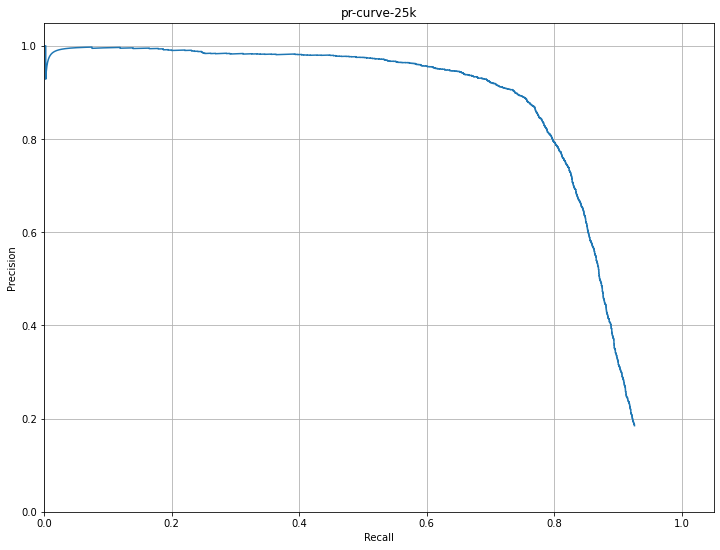

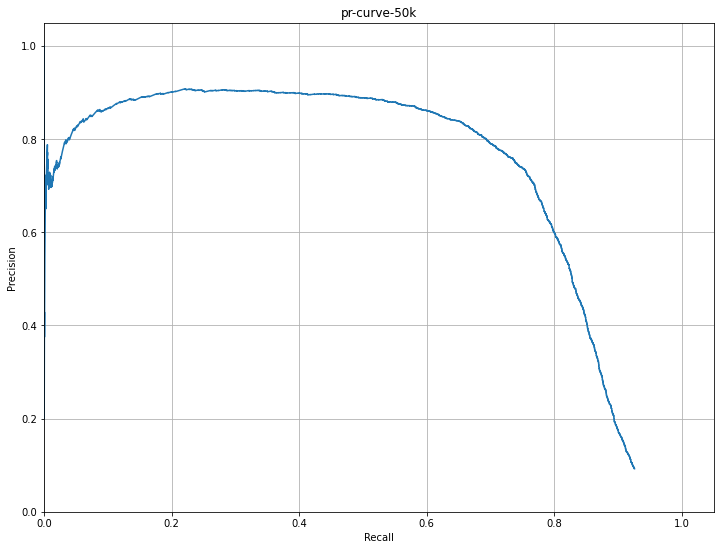

In [ ]:
from triplet_hardlibtf import *
generate_full_RefEmbeddings(base_model)#, gen_embed=True)

In [ ]:
generate_full_RefEmbeddings(base_model)#, gen_embed=True)#GOLD3

  found 1000000 images
Total IDS: 1000000
iters 20
reading files from 0 to 50000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [02:39<00:00,  3.13it/s]


Time for generation 2.6665249188741047 mins
*****embedding array shape: (50000, 4096)
Writing embedding to file./data/embed/full_ref_em_0deeprank.hdf5
reading files from 50000 to 100000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [02:47<00:00,  2.99it/s]


Time for generation 2.7836757858594257 mins
*****embedding array shape: (50000, 4096)
Writing embedding to file./data/embed/full_ref_em_1deeprank.hdf5
reading files from 100000 to 150000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [02:47<00:00,  2.99it/s]


Time for generation 2.783667707443237 mins
*****embedding array shape: (50000, 4096)
Writing embedding to file./data/embed/full_ref_em_2deeprank.hdf5
reading files from 150000 to 200000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [02:48<00:00,  2.97it/s]


Time for generation 2.8072654843330382 mins
*****embedding array shape: (50000, 4096)
Writing embedding to file./data/embed/full_ref_em_3deeprank.hdf5
reading files from 200000 to 250000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [02:49<00:00,  2.95it/s]


Time for generation 2.826029340426127 mins
*****embedding array shape: (50000, 4096)
Writing embedding to file./data/embed/full_ref_em_4deeprank.hdf5
reading files from 250000 to 300000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [02:50<00:00,  2.94it/s]


Time for generation 2.835347656408946 mins
*****embedding array shape: (50000, 4096)
Writing embedding to file./data/embed/full_ref_em_5deeprank.hdf5
reading files from 300000 to 350000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [02:48<00:00,  2.96it/s]


Time for generation 2.812744414806366 mins
*****embedding array shape: (50000, 4096)
Writing embedding to file./data/embed/full_ref_em_6deeprank.hdf5
reading files from 350000 to 400000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [02:50<00:00,  2.94it/s]


Time for generation 2.8339067101478577 mins
*****embedding array shape: (50000, 4096)
Writing embedding to file./data/embed/full_ref_em_7deeprank.hdf5
reading files from 400000 to 450000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [02:50<00:00,  2.94it/s]


Time for generation 2.838979748884837 mins
*****embedding array shape: (50000, 4096)
Writing embedding to file./data/embed/full_ref_em_8deeprank.hdf5
reading files from 450000 to 500000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [02:49<00:00,  2.95it/s]


Time for generation 2.8237065712610883 mins
*****embedding array shape: (50000, 4096)
Writing embedding to file./data/embed/full_ref_em_9deeprank.hdf5
reading files from 500000 to 550000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [02:49<00:00,  2.94it/s]


Time for generation 2.8303626775741577 mins
*****embedding array shape: (50000, 4096)
Writing embedding to file./data/embed/full_ref_em_10deeprank.hdf5
reading files from 550000 to 600000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [02:48<00:00,  2.96it/s]


Time for generation 2.8124541640281677 mins
*****embedding array shape: (50000, 4096)
Writing embedding to file./data/embed/full_ref_em_11deeprank.hdf5
reading files from 600000 to 650000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [02:51<00:00,  2.92it/s]


Time for generation 2.8557783007621764 mins
*****embedding array shape: (50000, 4096)
Writing embedding to file./data/embed/full_ref_em_12deeprank.hdf5
reading files from 650000 to 700000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [02:49<00:00,  2.95it/s]


Time for generation 2.823662316799164 mins
*****embedding array shape: (50000, 4096)
Writing embedding to file./data/embed/full_ref_em_13deeprank.hdf5
reading files from 700000 to 750000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [02:49<00:00,  2.96it/s]


Time for generation 2.8183109362920127 mins
*****embedding array shape: (50000, 4096)
Writing embedding to file./data/embed/full_ref_em_14deeprank.hdf5
reading files from 750000 to 800000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [02:48<00:00,  2.96it/s]


Time for generation 2.8154722690582275 mins
*****embedding array shape: (50000, 4096)
Writing embedding to file./data/embed/full_ref_em_15deeprank.hdf5
reading files from 800000 to 850000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [02:50<00:00,  2.94it/s]


Time for generation 2.8384551048278808 mins
*****embedding array shape: (50000, 4096)
Writing embedding to file./data/embed/full_ref_em_16deeprank.hdf5
reading files from 850000 to 900000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [02:49<00:00,  2.95it/s]


Time for generation 2.828056263923645 mins
*****embedding array shape: (50000, 4096)
Writing embedding to file./data/embed/full_ref_em_17deeprank.hdf5
reading files from 900000 to 950000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [02:49<00:00,  2.94it/s]


Time for generation 2.8305302381515505 mins
*****embedding array shape: (50000, 4096)
Writing embedding to file./data/embed/full_ref_em_18deeprank.hdf5
reading files from 950000 to 1000000
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [02:50<00:00,  2.94it/s]


Time for generation 2.833888634045919 mins
*****embedding array shape: (50000, 4096)
Writing embedding to file./data/embed/full_ref_em_19deeprank.hdf5
  found 50000 images
Inference for generating embedding. THis will take long....


100%|██████████| 1000/1000 [04:21<00:00,  3.83it/s]


Time for generation 4.352468494574229 mins
*****embedding array shape: (50000, 4096)
Writing embedding to file./data/embed/full_query_em_deeprank.hdf5


Inside: generate_triplets_hdfseq: total seq data= 4976, neg data= 54848
current date time:  18-10-2021_H16_M22


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/20
139/139 [==============================] - 49s 179ms/step - loss: 0.0122 - val_loss: 2.2145e-04
Epoch 2/20
139/139 [==============================] - 23s 164ms/step - loss: 0.0027 - val_loss: 0.0000e+00
Epoch 3/20
139/139 [==============================] - 22s 156ms/step - loss: 0.0022 - val_loss: 7.7250e-04
Epoch 4/20
139/139 [==============================] - 21s 153ms/step - loss: 0.0016 - val_loss: 0.0000e+00
Epoch 5/20
139/139 [==============================] - 21s 152ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 6/20
139/139 [==============================] - 21s 152ms/step - loss: 0.0026 - val_loss: 0.0023
Epoch 7/20
139/139 [==============================] - 21s 150ms/step - loss: 0.0014 - val_loss: 0.0000e+00
Epoch 8/20
139/139 [==============================] - 21s 149ms/step - loss: 5.4916e-04 - val_loss: 0.0000e+00
Epoch 9/20
139/139 [==============================] - 21s 148ms/step - loss: 3.6747e-04 - val_loss: 0.0000e+00
Epoch 10/20
139/139 [================

100%|██████████| 155/155 [01:00<00:00,  2.56it/s]


Time for generation 1.0110182285308837 mins
embedding array shape: (4960, 4096)
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:17<00:00,  2.00it/s]


Time for generation 1.291250475247701 mins
embedding array shape: (4960, 4096)
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 15.181451612903226% : 
I[0:5 [[1230]
 [2025]
 [2133]
 [2862]
 [3747]]
D[0:5 [[0.01206017]
 [0.00067401]
 [0.00325561]
 [0.0079062 ]
 [0.01756084]]
  found 54878 images
Inference for generating embedding. THis will take long....


100%|██████████| 1097/1097 [04:44<00:00,  3.86it/s]


Time for generation 4.73745729525884 mins
*****embedding array shape: (54850, 4096)
Writing embedding to file./data/embed/subset_refExtended_em_deeprank.hdf5
  found 50000 images
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:38<00:00,  5.06it/s]


Time for generation 1.646845018863678 mins
*****embedding array shape: (25000, 4096)
Writing embedding to file./data/embed/full_query_em_deeprank.hdf5
XQ embedding array shape: (25000, 4096)
XD embedding array shape: (54850, 4096)
*******Total no of correct predictions:  614
ntp at 9=10, 49=29,99=39, 499=103, 999=171,
 4999=371,7999=451, 9999=488,11999=526
probas_pred at 9=-7.450580596923828e-05, 49=-0.00022649765014648438,99=-0.0002765655517578125, 499=-0.0006097555160522461, 999=-0.0009369850158691406,
 4999=-0.00248563289642334,7999=-0.0035570859909057617, 9999=-0.004461407661437988,11999=-0.00552213191986084
precision at p[99]=0.39, p[499]=0.206,p[999]=0.171, p[4999]=0.0742,p[9999]=0.0488
recall at r[99]=0.007814065317571629, r[499]=0.02063714686435584,r[999]=0.03426167100781406, r[4999]=0.07433380084151472,r[9999]=0.09777599679422962
Average Precision: 0.02011
Recall at P90    : 0.00461
Threshold at P90 : -0.000169039
Recall at rank 1:  0.12302
Recall at rank 10: 0.12302
*******To

ValueError: ignored

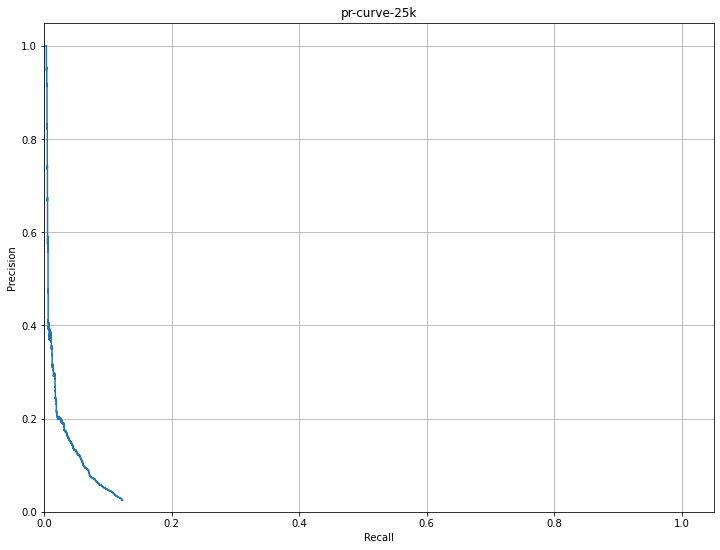

In [ ]:

#base_model = embedding_model()
#model = complete_model(base_model)
modelFilePath = "./models/weights/"
#base_model.load_weights('models/weights/resnet50tf_base_89P_GOLD1.hdf5')
#model.load_weights(modelFilePath + 'resnet50tf_complete_final_89P_GOLD1.hdf5')
#model.summary()
model.compile(loss=identity_loss, optimizer=Adam(1e-4))
model, base_model = train_basic(model, base_model, epochs=20,batchsize = 32)
I1 = findAccuracy(base_model)
pickle.dump(I1, open("./data/L2Index_2_prev.p", "wb"))
generate_full_QueryEmbeddings(base_model)

Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:08<00:00,  2.27it/s]


Time for generation 1.140067704518636 mins
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:26<00:00,  1.80it/s]


Time for generation 1.4377158125241598 mins
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 94.39516129032258% : 
I[0:5 [[2800]
 [   1]
 [   2]
 [4861]
 [   4]]
D[0:5 [[0.37233746]
 [0.03366828]
 [0.04429507]
 [0.40273094]
 [0.127828  ]]
  found 54878 images
Inference for generating embedding. THis will take long....


100%|██████████| 1097/1097 [02:45<00:00,  6.63it/s]


Time for generation 2.7583481470743814 mins
Writing embedding to file./data/embed/subset_refExtended_em_resnet50tf2deep.hdf5
  found 50000 images
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:14<00:00,  6.68it/s]


Time for generation 1.2483887831370035 mins
Writing embedding to file./data/embed/full_query_em_resnet50tf2deep.hdf5
*******Total no of correct predictions:  4462
ntp at 9=9, 49=49,99=99, 499=499, 999=998,
 4999=3633,7999=3928, 9999=4014,11999=4080
probas_pred at 9=-0.0014990568161010742, 49=-0.00493311882019043,99=-0.007464885711669922, 499=-0.017050981521606445, 999=-0.024312853813171387,
 4999=-0.09715604782104492,7999=-0.12526237964630127, 9999=-0.13907432556152344,11999=-0.1517484188079834
precision at p[99]=0.99, p[499]=0.998,p[999]=0.998, p[4999]=0.7266,p[9999]=0.4014
recall at r[99]=0.019835704267681827, r[499]=0.09997996393508315,r[999]=0.1999599278701663, r[4999]=0.7279102384291725,r[9999]=0.8042476457623723
Average Precision: 0.77130
Recall at P90    : 0.64997
Threshold at P90 : -0.0741904
Recall at rank 1:  0.89401
Recall at rank 10: 0.89401
*******Total no of correct predictions:  4462
*******Total no of incorrect predictions:  20538
*************Suggested accuracy from me

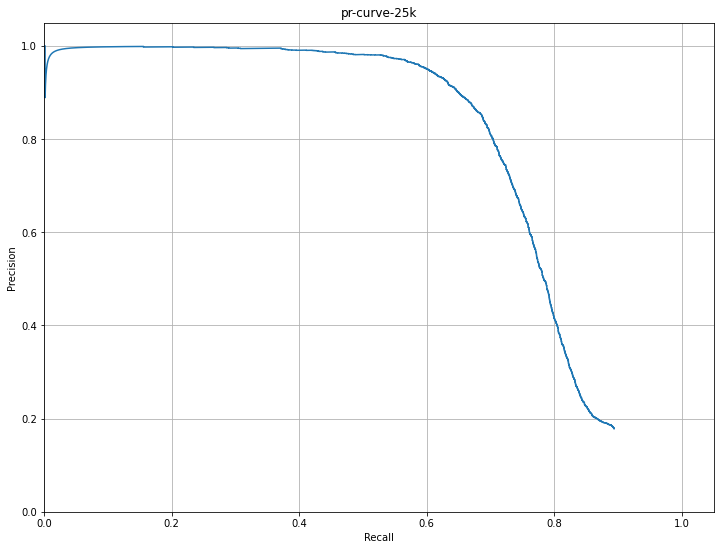

In [ ]:
I1= findAccuracy(base_model)
pickle.dump(I1, open("./data/L2Index_2_prev.p", "wb"))
generate_full_QueryEmbeddings(base_model)

current date time:  18-10-2021_H16_M44
Inside: generate_triplets_hdfseq: total seq data= 500
Starting train dev training process!
-------------------------------------


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/10
500/500 [==============================] - 617s 1s/step - loss: 0.2267 - val_loss: 0.1138
Epoch 2/10
500/500 [==============================] - 588s 1s/step - loss: 0.0977 - val_loss: 0.1051
Epoch 3/10
500/500 [==============================] - 588s 1s/step - loss: 0.0789 - val_loss: 0.0959
Epoch 4/10
500/500 [==============================] - 588s 1s/step - loss: 0.0666 - val_loss: 0.0742
Epoch 5/10
500/500 [==============================] - 592s 1s/step - loss: 0.0606 - val_loss: 0.0899
Epoch 6/10
500/500 [==============================] - 583s 1s/step - loss: 0.0551 - val_loss: 0.0709
Epoch 7/10
500/500 [==============================] - 586s 1s/step - loss: 0.0514 - val_loss: 0.0939
Epoch 8/10
500/500 [==============================] - 598s 1s/step - loss: 0.0482 - val_loss: 0.0841
Epoch 9/10
500/500 [==============================] - 600s 1s/step - loss: 0.0459 - val_loss: 0.0776
Epoch 10/10
500/500 [==============================] - 597s 1s/step - loss: 0.0425 - val_lo

100%|██████████| 155/155 [01:01<00:00,  2.51it/s]


Time for generation 1.029519800345103 mins
embedding array shape: (4960, 4096)
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:19<00:00,  1.96it/s]


Time for generation 1.3173803528149923 mins
embedding array shape: (4960, 4096)
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 21.411290322580644% : 
I[0:5 [[3164]
 [3893]
 [2959]
 [1197]
 [ 355]]
D[0:5 [[0.17155182]
 [0.19393635]
 [0.2577269 ]
 [0.09578896]
 [0.41258073]]
  found 54878 images
Inference for generating embedding. THis will take long....


100%|██████████| 1097/1097 [05:00<00:00,  3.65it/s]


Time for generation 5.007792059580485 mins
*****embedding array shape: (54850, 4096)
Writing embedding to file./data/embed/subset_refExtended_em_deeprank.hdf5
  found 50000 images
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:40<00:00,  4.98it/s]


Time for generation 1.6732706109682718 mins
*****embedding array shape: (25000, 4096)
Writing embedding to file./data/embed/full_query_em_deeprank.hdf5
XQ embedding array shape: (25000, 4096)
XD embedding array shape: (54850, 4096)
*******Total no of correct predictions:  708
ntp at 9=8, 49=48,99=83, 499=225, 999=319,
 4999=491,7999=553, 9999=582,11999=612
probas_pred at 9=-0.0016350746154785156, 49=-0.009558677673339844,99=-0.018224120140075684, 499=-0.05393648147583008, 999=-0.07435238361358643,
 4999=-0.13669848442077637,7999=-0.1631098985671997, 9999=-0.17836737632751465,11999=-0.19261932373046875
precision at p[99]=0.83, p[499]=0.45,p[999]=0.319, p[4999]=0.0982,p[9999]=0.0582
recall at r[99]=0.016629933880985773, r[499]=0.04508114606291325,r[999]=0.06391504708475255, r[4999]=0.09837707874173512,r[9999]=0.11660989781606892
Average Precision: 0.05022
Recall at P90    : 0.01342
Threshold at P90 : -0.0149521
Recall at rank 1:  0.14186
Recall at rank 10: 0.14186
*******Total no of corr

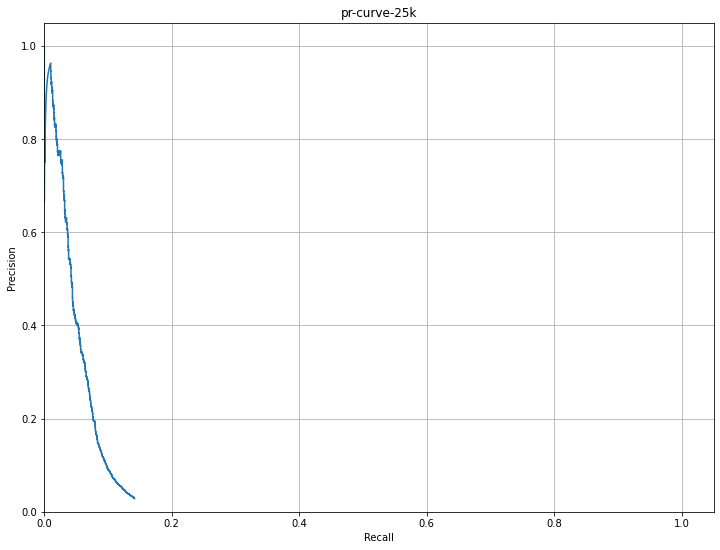

In [ ]:
model.compile(loss=identity_loss, optimizer=Adam(1e-4))
model, base_model = train_basic_traindev(model, base_model, epochs=10,batchsize = 100)
I1 = findAccuracy(base_model)
#pickle.dump(I_1, open("./data/L2Index_2_prev.p", "wb"))
generate_full_QueryEmbeddings(base_model)
#save_models_weights("train")

Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:01<00:00,  2.50it/s]


Time for generation 1.0313754200935363 mins
embedding array shape: (4960, 4096)
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:19<00:00,  1.96it/s]


Time for generation 1.3186838626861572 mins
embedding array shape: (4960, 4096)
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 24.39516129032258% : 
I[0:5 [[3164]
 [3824]
 [2179]
 [ 497]
 [1328]]
D[0:5 [[0.23128855]
 [0.30021036]
 [0.4853741 ]
 [0.14142835]
 [0.45282006]]
  found 54878 images
Inference for generating embedding. THis will take long....


100%|██████████| 1097/1097 [05:07<00:00,  3.56it/s]


Time for generation 5.1298617124557495 mins
*****embedding array shape: (54850, 4096)
Writing embedding to file./data/embed/subset_refExtended_em_deeprank.hdf5
  found 50000 images
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:40<00:00,  5.00it/s]


Time for generation 1.6671133120854695 mins
*****embedding array shape: (25000, 4096)
Writing embedding to file./data/embed/full_query_em_deeprank.hdf5
XQ embedding array shape: (25000, 4096)
XD embedding array shape: (54850, 4096)
*******Total no of correct predictions:  807
ntp at 9=9, 49=48,99=92, 499=272, 999=335,
 4999=556,7999=635, 9999=680,11999=714
probas_pred at 9=-0.0017338991165161133, 49=-0.011657953262329102,99=-0.022092223167419434, 499=-0.06828582286834717, 999=-0.09377157688140869,
 4999=-0.16721749305725098,7999=-0.19967365264892578, 9999=-0.21875286102294922,11999=-0.23649334907531738
precision at p[99]=0.92, p[499]=0.544,p[999]=0.335, p[4999]=0.1112,p[9999]=0.068
recall at r[99]=0.018433179723502304, r[499]=0.0544980965738329,r[999]=0.0671208174714486, r[4999]=0.11140052093768783,r[9999]=0.13624524143458225
Average Precision: 0.06215
Recall at P90    : 0.02084
Threshold at P90 : -0.0241196
Recall at rank 1:  0.16169
Recall at rank 10: 0.16169
*******Total no of corre

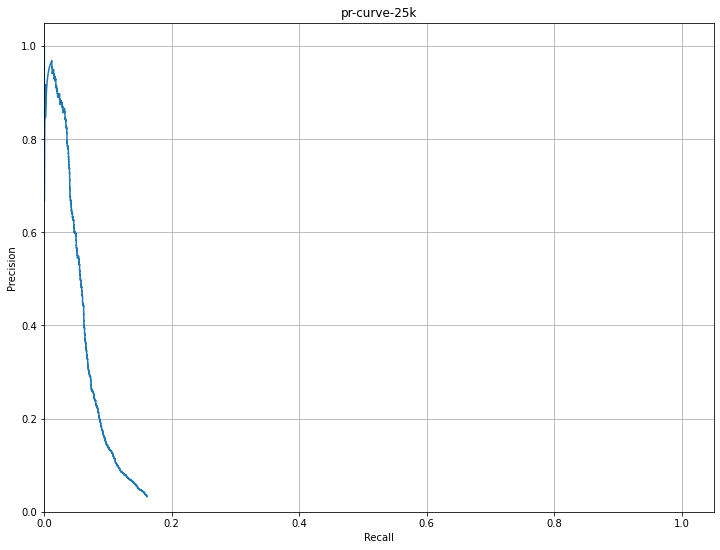

In [ ]:
#model.compile(loss=identity_loss, optimizer=Adam(1e-4))
#model, base_model = test_hardbatch_traindev(model, base_model, epochs=5,batchsize=30)#ep=35(recommended)
Ihardbatch = findAccuracy(base_model)
pickle.dump(Ihardbatch, open("./data/L2Index_2_prev.p", "wb"))
generate_full_QueryEmbeddings(base_model)
#save_models_weights("_online")

train_stop=  3000
current date time:  18-10-2021_H21_M02
Starting HardOffline training process!
-------------------------------------
Inside: generate_triplets_hdfseq: total seq data= 500
triplets1.shape=(16, 160, 160, 3),tripelet2 =(16, 160, 160, 3),merged=(32, 160, 160, 3)
300/1170 -------------
[300] Time for 300 iterations: 11.6 mins, Train Loss: 0.45188984274864197
val_loss =  0.7570612
best loss found, previous: 1000, current: 0.7570611834526062 
curr best_val_index=  300
600/1170 -------------
[600] Time for 600 iterations: 23.7 mins, Train Loss: 0.436248779296875
val_loss =  0.64372027
best loss found, previous: 0.7570611834526062, current: 0.643720269203186 
curr best_val_index=  600
900/1170 -------------
[900] Time for 900 iterations: 35.7 mins, Train Loss: 0.5916304588317871
val_loss =  0.50184894
best loss found, previous: 0.643720269203186, current: 0.5018489360809326 
curr best_val_index=  900
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [00:59<00:00,  2.60it/s]


Time for generation 0.9928268353144328 mins
embedding array shape: (4960, 4096)
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:14<00:00,  2.09it/s]


Time for generation 1.2356342156728108 mins
embedding array shape: (4960, 4096)
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 32.94354838709677% : 
I[0:5 [[1757]
 [3824]
 [4054]
 [   3]
 [2483]]
D[0:5 [[0.09607935]
 [0.22425151]
 [0.34058678]
 [0.05931032]
 [0.6094371 ]]
  found 54878 images
Inference for generating embedding. THis will take long....


100%|██████████| 1097/1097 [05:12<00:00,  3.51it/s]


Time for generation 5.203655282656352 mins
*****embedding array shape: (54850, 4096)
Writing embedding to file./data/embed/subset_refExtended_em_deeprank.hdf5
  found 50000 images
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:40<00:00,  4.97it/s]


Time for generation 1.6761579751968383 mins
*****embedding array shape: (25000, 4096)
Writing embedding to file./data/embed/full_query_em_deeprank.hdf5
XQ embedding array shape: (25000, 4096)
XD embedding array shape: (54850, 4096)
*******Total no of correct predictions:  1105
ntp at 9=9, 49=42,99=70, 499=195, 999=342,
 4999=736,7999=853, 9999=912,11999=958
probas_pred at 9=-0.0023919343948364258, 49=-0.010247349739074707,99=-0.017034530639648438, 499=-0.046575307846069336, 999=-0.07807409763336182,
 4999=-0.15694713592529297,7999=-0.18571627140045166, 9999=-0.20312190055847168,11999=-0.21974146366119385
precision at p[99]=0.7, p[499]=0.39,p[999]=0.342, p[4999]=0.1472,p[9999]=0.0912
recall at r[99]=0.014025245441795231, r[499]=0.03907032658785815,r[999]=0.06852334201562812, r[4999]=0.14746543778801843,r[9999]=0.18272891204167502
Average Precision: 0.06126
Recall at P90    : 0.00541
Threshold at P90 : -0.00685811
Recall at rank 1:  0.22140
Recall at rank 10: 0.22140
*******Total no of c

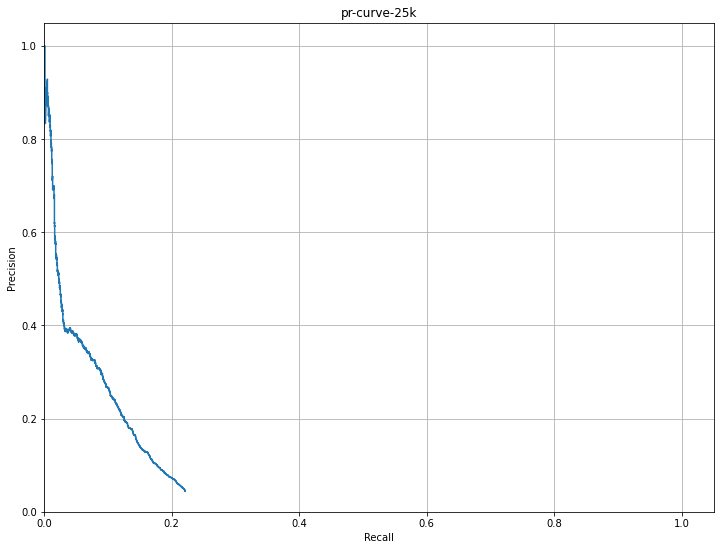

In [ ]:
from triplet_hardlibtf import *
pickle.dump(Ihardbatch, open("./data/L2Index_2_prev.p", "wb"))
model.compile(loss=identity_loss, optimizer=Adam(1e-4))
test_hardOffline_online_Batch(model, base_model, epochs=10,batchsize = 32,pat=100)
I1 = findAccuracy(base_model)
generate_full_QueryEmbeddings(base_model)

--------------running ith 0 iteration---------------------
train_stop=  2444
current date time:  19-10-2021_H00_M20
Starting HardOffline training process!
-------------------------------------
Inside: generate_triplets_hdfseq: total seq data= 500
triplets1.shape=(20, 160, 160, 3),tripelet2 =(20, 160, 160, 3),merged=(40, 160, 160, 3)
300/3040 -------------
[300] Time for 300 iterations: 12.6 mins, Train Loss: 0.257796972990036
val_loss =  0.4735206
best loss found, previous: 1000, current: 0.4735206067562103 
curr best_val_index=  300
600/3040 -------------
[600] Time for 600 iterations: 25.6 mins, Train Loss: 0.3136226534843445
val_loss =  0.41861928
best loss found, previous: 0.4735206067562103, current: 0.4186192750930786 
curr best_val_index=  600
900/3040 -------------
[900] Time for 900 iterations: 38.3 mins, Train Loss: 0.2438318282365799
val_loss =  0.3644726
best loss found, previous: 0.4186192750930786, current: 0.3644725978374481 
curr best_val_index=  900
1200/3040 ---------

100%|██████████| 155/155 [01:03<00:00,  2.44it/s]


Time for generation 1.0567802906036377 mins
embedding array shape: (4960, 4096)
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:17<00:00,  1.99it/s]


Time for generation 1.295345429579417 mins
embedding array shape: (4960, 4096)
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 54.37499999999999% : 
I[0:5 [[ 972]
 [4413]
 [ 185]
 [3319]
 [   4]]
D[0:5 [[0.16763246]
 [0.3002051 ]
 [0.26718462]
 [0.16971338]
 [0.290192  ]]
basemodelname =  models/weights/deeprank_base_GOLD20.hdf5
saved model weights and copied to google drive
--------------running ith 1 iteration---------------------
train_stop=  2980
current date time:  19-10-2021_H02_M33
Starting HardOffline training process!
-------------------------------------
Inside: generate_triplets_hdfseq: total seq data= 500
triplets1.shape=(20, 160, 160, 3),tripelet2 =(20, 160, 160, 3),merged=(40, 160, 160, 3)
300/2976 -------------
[300] Time for 300 iterations: 12.7 mins, Train Loss: 0.2134401798248291
val_loss =  0.2998912
best loss found, previous: 1000, current: 0.2998912036418915 
curr best_val_index=  300
600/2976 -------------
[600] Time

100%|██████████| 155/155 [01:01<00:00,  2.52it/s]


Time for generation 1.0254127899805705 mins
embedding array shape: (4960, 4096)
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:14<00:00,  2.07it/s]


Time for generation 1.2471347371737163 mins
embedding array shape: (4960, 4096)
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 79.83870967741935% : 
I[0:5 [[4363]
 [   1]
 [   2]
 [4236]
 [   4]]
D[0:5 [[0.23058462]
 [0.19438922]
 [0.37986362]
 [0.08013022]
 [0.38625348]]
basemodelname =  models/weights/deeprank_base_GOLD20.hdf5
saved model weights and copied to google drive
--------------running ith 2 iteration---------------------
train_stop=  3069
current date time:  19-10-2021_H04_M45
Starting HardOffline training process!
-------------------------------------
Inside: generate_triplets_hdfseq: total seq data= 500
triplets1.shape=(20, 160, 160, 3),tripelet2 =(20, 160, 160, 3),merged=(40, 160, 160, 3)
300/2375 -------------
[300] Time for 300 iterations: 12.4 mins, Train Loss: 0.18555793166160583
val_loss =  0.16915502
best loss found, previous: 1000, current: 0.16915501654148102 
curr best_val_index=  300
600/2375 -------------
[600] 

100%|██████████| 155/155 [01:01<00:00,  2.54it/s]


Time for generation 1.0172838727633158 mins
embedding array shape: (4960, 4096)
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:14<00:00,  2.08it/s]


Time for generation 1.2433723290761312 mins
embedding array shape: (4960, 4096)
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 88.75% : 
I[0:5 [[   0]
 [   1]
 [3865]
 [   3]
 [   4]]
D[0:5 [[0.2530197 ]
 [0.14481473]
 [0.34524357]
 [0.19685173]
 [0.3817153 ]]
basemodelname =  models/weights/deeprank_base_GOLD20.hdf5
saved model weights and copied to google drive
--------------running ith 3 iteration---------------------
train_stop=  3117
current date time:  19-10-2021_H06_M29
Starting HardOffline training process!
-------------------------------------
Inside: generate_triplets_hdfseq: total seq data= 500
triplets1.shape=(20, 160, 160, 3),tripelet2 =(20, 160, 160, 3),merged=(40, 160, 160, 3)
300/1940 -------------
[300] Time for 300 iterations: 12.3 mins, Train Loss: 0.15658459067344666
val_loss =  0.11954968
best loss found, previous: 1000, current: 0.11954967677593231 
curr best_val_index=  300
600/1940 -------------
[600] Time for 600

100%|██████████| 155/155 [01:00<00:00,  2.55it/s]


Time for generation 1.011873439947764 mins
embedding array shape: (4960, 4096)
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:14<00:00,  2.07it/s]


Time for generation 1.2455369393030802 mins
embedding array shape: (4960, 4096)
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 93.20564516129032% : 
I[0:5 [[1940]
 [   1]
 [   2]
 [   3]
 [   4]]
D[0:5 [[0.31987274]
 [0.2060169 ]
 [0.29888654]
 [0.15766132]
 [0.4191954 ]]
basemodelname =  models/weights/deeprank_base_GOLD20.hdf5
saved model weights and copied to google drive
--------------running ith 4 iteration---------------------
train_stop=  3145
current date time:  19-10-2021_H07_M54
Starting HardOffline training process!
-------------------------------------
Inside: generate_triplets_hdfseq: total seq data= 500
triplets1.shape=(20, 160, 160, 3),tripelet2 =(20, 160, 160, 3),merged=(40, 160, 160, 3)
300/1568 -------------
[300] Time for 300 iterations: 12.2 mins, Train Loss: 0.13692502677440643
val_loss =  0.09079738
best loss found, previous: 1000, current: 0.09079737961292267 
curr best_val_index=  300
600/1568 -------------
[600] 

100%|██████████| 155/155 [01:00<00:00,  2.56it/s]


Time for generation 1.0093210458755493 mins
embedding array shape: (4960, 4096)
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:14<00:00,  2.08it/s]


Time for generation 1.2394020477930705 mins
embedding array shape: (4960, 4096)
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 94.41532258064517% : 
I[0:5 [[   0]
 [   1]
 [   2]
 [4801]
 [   4]]
D[0:5 [[0.18105865]
 [0.17282677]
 [0.23454058]
 [0.33502972]
 [0.39290464]]
basemodelname =  models/weights/deeprank_base_GOLD20.hdf5
saved model weights and copied to google drive
--------------running ith 5 iteration---------------------
train_stop=  3170
current date time:  19-10-2021_H09_M02
Starting HardOffline training process!
-------------------------------------
Inside: generate_triplets_hdfseq: total seq data= 500
triplets1.shape=(20, 160, 160, 3),tripelet2 =(20, 160, 160, 3),merged=(40, 160, 160, 3)
300/1287 -------------
[300] Time for 300 iterations: 12.3 mins, Train Loss: 0.18594273924827576
val_loss =  0.0801534
best loss found, previous: 1000, current: 0.08015339821577072 
curr best_val_index=  300
600/1287 -------------
[600] T

100%|██████████| 155/155 [00:59<00:00,  2.59it/s]


Time for generation 0.9975921273231506 mins
embedding array shape: (4960, 4096)
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:14<00:00,  2.09it/s]


Time for generation 1.2335647781689962 mins
embedding array shape: (4960, 4096)
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 95.88709677419355% : 
I[0:5 [[0]
 [1]
 [2]
 [3]
 [4]]
D[0:5 [[0.13070166]
 [0.21573186]
 [0.22813153]
 [0.13027358]
 [0.3117906 ]]
basemodelname =  models/weights/deeprank_base_GOLD20.hdf5
saved model weights and copied to google drive
out of loop
  found 54878 images
Inference for generating embedding. THis will take long....


100%|██████████| 1097/1097 [05:03<00:00,  3.61it/s]


Time for generation 5.0615771571795145 mins
*****embedding array shape: (54850, 4096)
Writing embedding to file./data/embed/subset_refExtended_em_deeprank.hdf5
  found 50000 images
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:37<00:00,  5.10it/s]


Time for generation 1.6333591222763062 mins
*****embedding array shape: (25000, 4096)
Writing embedding to file./data/embed/full_query_em_deeprank.hdf5
XQ embedding array shape: (25000, 4096)
XD embedding array shape: (54850, 4096)
*******Total no of correct predictions:  3921
ntp at 9=9, 49=48,99=93, 499=382, 999=662,
 4999=2093,7999=2700, 9999=3010,11999=3246
probas_pred at 9=-0.0028551816940307617, 49=-0.020902276039123535,99=-0.03868138790130615, 499=-0.10858845710754395, 999=-0.13965058326721191,
 4999=-0.23047542572021484,7999=-0.2690213918685913, 9999=-0.29085445404052734,11999=-0.3118882179260254
precision at p[99]=0.93, p[499]=0.764,p[999]=0.662, p[4999]=0.4186,p[9999]=0.301
recall at r[99]=0.018633540372670808, r[499]=0.07653776798236826,r[999]=0.1326387497495492, r[4999]=0.41935483870967744,r[9999]=0.603085553997195
Average Precision: 0.36616
Recall at P90    : 0.03426
Threshold at P90 : -0.0608736
Recall at rank 1:  0.78561
Recall at rank 10: 0.78561
*******Total no of corr

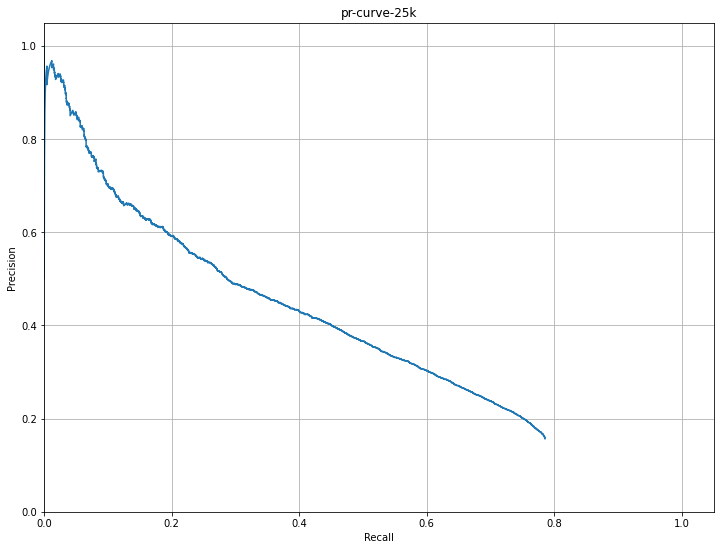

In [ ]:
'''
save_code()
from getmodel import *
print(get_model_name())
!cp /content/drive/MyDrive/collab_drive/model_artifacts-dev-tf/resnet50tf3scale_base_eval1.hdf5 ./models/weights/
base_model = embedding_model(drop=0.3)
base_model.load_weights('models/weights/resnet50tf3scale_base_eval1.hdf5')
model = complete_model(base_model)
'''
from settings import *
#model = complete_model(base_model)
model.compile(loss=identity_loss, optimizer=Adam(5e-5))
from copy import deepcopy
#save_models_weights("tf2")
#generate_full_QueryEmbeddings(base_model)
#I1 = Inew
#I1 = findAccuracy(base_model)
#Inew = combine_Is(I1, Inew)
#save_code()
Inew =[]

for i in range(6):
  print("--------------running ith {} iteration---------------------".format(i))
  if i>=1:
    Inew = combine_Is(I1, Inew)
  else:
    Inew = deepcopy(I1)
  pickle.dump(Inew, open("./data/L2Index_2_prev.p", "wb")) #epochs =300 is best
  model, base_model = test_hardOffline_online_Batch(model, base_model, epochs=int(40*(0.8**i)),batchsize = 40,pat=100)
  #model, base_model = test_hardOfflineBatch(model, base_model, epochs=200,batchsize=16)
  I1 = findAccuracy(base_model)
  save_models_weights("GOLD20")
print("out of loop")
generate_full_QueryEmbeddings(base_model)
save_models_weights("GOLD20")

In [ ]:
!cp ./models/weights/OFF_Embeddings_res50_best.hdf5 /content/drive/MyDrive/collab_drive/model_artifacts-dev-tf


basemodelname =  models/weights/deeprank_base_GOLD20.hdf5
saved model weights and copied to google drive
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:02<00:00,  2.49it/s]


Time for generation 1.036176602045695 mins
embedding array shape: (4960, 4096)
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:15<00:00,  2.07it/s]


Time for generation 1.2501776576042176 mins
embedding array shape: (4960, 4096)
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 38.40725806451613% : 
I[0:5 [[4821]
 [1276]
 [ 946]
 [2271]
 [ 761]]
D[0:5 [[0.10996866]
 [0.3520279 ]
 [0.42042363]
 [0.07604742]
 [0.52595377]]
  found 54878 images
Inference for generating embedding. THis will take long....


100%|██████████| 1097/1097 [05:02<00:00,  3.63it/s]


Time for generation 5.035540314515432 mins
*****embedding array shape: (54850, 4096)
Writing embedding to file./data/embed/subset_refExtended_em_deeprank.hdf5
  found 50000 images
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:41<00:00,  4.93it/s]


Time for generation 1.6895885348320008 mins
*****embedding array shape: (25000, 4096)
Writing embedding to file./data/embed/full_query_em_deeprank.hdf5
XQ embedding array shape: (25000, 4096)
XD embedding array shape: (54850, 4096)
*******Total no of correct predictions:  1158
ntp at 9=8, 49=46,99=86, 499=245, 999=345,
 4999=734,7999=840, 9999=898,11999=957
probas_pred at 9=-0.0035452842712402344, 49=-0.015101909637451172,99=-0.02753305435180664, 499=-0.07026040554046631, 999=-0.0994412899017334,
 4999=-0.18940293788909912,7999=-0.22293174266815186, 9999=-0.2420881986618042,11999=-0.26069164276123047
precision at p[99]=0.86, p[499]=0.49,p[999]=0.345, p[4999]=0.1468,p[9999]=0.0898
recall at r[99]=0.017231015828491285, r[499]=0.04908835904628331,r[999]=0.06912442396313365, r[4999]=0.14706471648968142,r[9999]=0.17992386295331597
Average Precision: 0.07027
Recall at P90    : 0.01082
Threshold at P90 : -0.0171924
Recall at rank 1:  0.23202
Recall at rank 10: 0.23202
*******Total no of corre

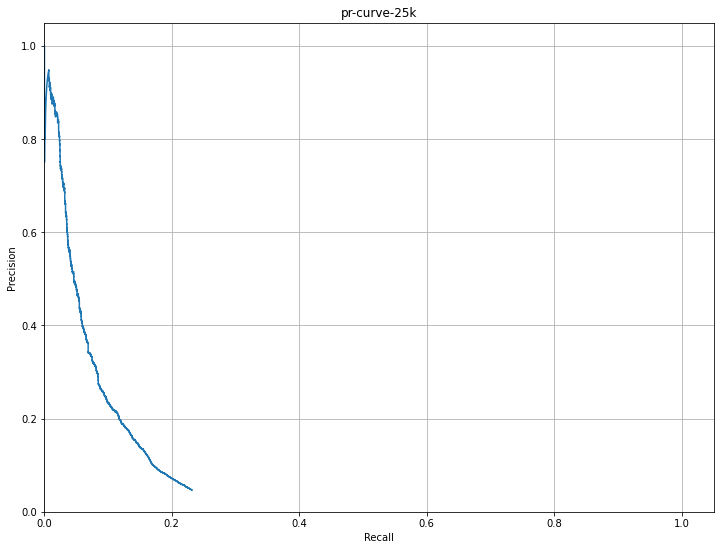

In [ ]:
save_models_weights("GOLD20")
#print(len(Inew),Inew[0:5])
I1=findAccuracy(base_model)
generate_full_QueryEmbeddings(base_model)

In [ ]:
from triplet_hardlibtf import *
#base_model.load_weights('models/weights/resnet50tf_base_GOLD3.hdf5')
#model = complete_model(base_model)
model.compile(loss=identity_loss, optimizer=Adam(1e-5))
from copy import deepcopy
#I1 = findAccuracy(base_model)
#save_code()
Inew =[]

for i in range(7):
  if i>=1:
    Inew = combine_Is(I1, Inew)
  else:
    Inew = deepcopy(I1)
  pickle.dump(Inew, open("./data/L2Index_2_prev.p", "wb")) #epochs =300 is best
  model, base_model = test_hardOfflineBatch(model, base_model, epochs=200,batchsize=40)
  I1 = findAccuracy(base_model)
  save_models_weights("GOLD21")
print("out of loop")
generate_full_QueryEmbeddings(base_model)
save_models_weights("GOLD21")#GOLD4

train_stop=  180
current date time:  19-10-2021_H13_M31
Starting HardOffline training process!
-------------------------------------
100/800 -------------
[100] Time for 100 iterations: 2.6 mins, Train Loss: 0.4214516580104828
val_loss =  0.35875022
best loss found, previous: 1000, current: 0.35875022411346436 
curr best_val_index=  100
200/800 -------------
[200] Time for 200 iterations: 5.2 mins, Train Loss: 0.15708893537521362
val_loss =  0.2205555
best loss found, previous: 0.35875022411346436, current: 0.22055549919605255 
curr best_val_index=  200
300/800 -------------
[300] Time for 300 iterations: 7.8 mins, Train Loss: 0.16002649068832397
val_loss =  0.1365265
best loss found, previous: 0.22055549919605255, current: 0.13652649521827698 
curr best_val_index=  300
400/800 -------------
[400] Time for 400 iterations: 10.3 mins, Train Loss: 0.20633092522621155
val_loss =  0.047258656
best loss found, previous: 0.13652649521827698, current: 0.0472586564719677 
curr best_val_index=  

100%|██████████| 155/155 [00:59<00:00,  2.59it/s]


Time for generation 0.9968484401702881 mins
embedding array shape: (4960, 4096)
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:14<00:00,  2.09it/s]


Time for generation 1.2389108141263325 mins
embedding array shape: (4960, 4096)
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 91.91532258064517% : 
I[0:5 [[0]
 [1]
 [2]
 [3]
 [4]]
D[0:5 [[0.18242335]
 [0.25784302]
 [0.26025403]
 [0.43015456]
 [0.20830178]]
basemodelname =  models/weights/deeprank_base_GOLD21.hdf5
saved model weights and copied to google drive
train_stop=  488
current date time:  19-10-2021_H13_M54
Starting HardOffline training process!
-------------------------------------
100/2400 -------------
[100] Time for 100 iterations: 2.5 mins, Train Loss: 0.25772756338119507
val_loss =  0.21597244
best loss found, previous: 1000, current: 0.215972438454628 
curr best_val_index=  100
200/2400 -------------
[200] Time for 200 iterations: 5.1 mins, Train Loss: 0.1778651773929596
val_loss =  0.17584081
best loss found, previous: 0.215972438454628, current: 0.1758408099412918 
curr best_val_index=  200
300/2400 -------------
[300] T

100%|██████████| 155/155 [01:00<00:00,  2.58it/s]


Time for generation 1.001775856812795 mins
embedding array shape: (4960, 4096)
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:15<00:00,  2.07it/s]


Time for generation 1.2502842704455057 mins
embedding array shape: (4960, 4096)
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 89.47580645161291% : 
I[0:5 [[   0]
 [4840]
 [   2]
 [   3]
 [   4]]
D[0:5 [[0.1904149 ]
 [0.36154485]
 [0.33287132]
 [0.5266402 ]
 [0.4235171 ]]
basemodelname =  models/weights/deeprank_base_GOLD21.hdf5
saved model weights and copied to google drive
train_stop=  891
current date time:  19-10-2021_H14_M54
Starting HardOffline training process!
-------------------------------------
100/4400 -------------
[100] Time for 100 iterations: 2.6 mins, Train Loss: 0.1640053689479828
val_loss =  0.1954517
best loss found, previous: 1000, current: 0.19545170664787292 
curr best_val_index=  100
200/4400 -------------
[200] Time for 200 iterations: 5.3 mins, Train Loss: 0.13690437376499176
val_loss =  0.13045305
best loss found, previous: 0.19545170664787292, current: 0.13045305013656616 
curr best_val_index=  200
300/4400 --

100%|██████████| 155/155 [00:59<00:00,  2.62it/s]


Time for generation 0.986188288529714 mins
embedding array shape: (4960, 4096)
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:14<00:00,  2.08it/s]


Time for generation 1.239632487297058 mins
embedding array shape: (4960, 4096)
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 94.83870967741936% : 
I[0:5 [[0]
 [1]
 [2]
 [3]
 [4]]
D[0:5 [[0.17459226]
 [0.17579603]
 [0.3322773 ]
 [0.25378633]
 [0.21313906]]
basemodelname =  models/weights/deeprank_base_GOLD21.hdf5
saved model weights and copied to google drive
train_stop=  1090
current date time:  19-10-2021_H16_M53
Starting HardOffline training process!
-------------------------------------
100/5400 -------------
[100] Time for 100 iterations: 2.5 mins, Train Loss: 0.13181495666503906
val_loss =  0.104118206
best loss found, previous: 1000, current: 0.10411820560693741 
curr best_val_index=  100
200/5400 -------------
[200] Time for 200 iterations: 5.2 mins, Train Loss: 0.08019156754016876
val_loss =  0.08618418
best loss found, previous: 0.10411820560693741, current: 0.08618418127298355 
curr best_val_index=  200
300/5400 -------------


100%|██████████| 155/155 [00:58<00:00,  2.64it/s]


Time for generation 0.9797785560290019 mins
embedding array shape: (4960, 4096)
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:13<00:00,  2.10it/s]


Time for generation 1.2304473757743835 mins
embedding array shape: (4960, 4096)
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 96.75403225806451% : 
I[0:5 [[0]
 [1]
 [2]
 [3]
 [4]]
D[0:5 [[0.1903646 ]
 [0.22395158]
 [0.3224752 ]
 [0.28265095]
 [0.24752426]]
basemodelname =  models/weights/deeprank_base_GOLD21.hdf5
saved model weights and copied to google drive
train_stop=  1214
current date time:  19-10-2021_H19_M19
Starting HardOffline training process!
-------------------------------------
100/6000 -------------
[100] Time for 100 iterations: 2.5 mins, Train Loss: 0.045138753950595856
val_loss =  0.05669476
best loss found, previous: 1000, current: 0.05669476091861725 
curr best_val_index=  100
200/6000 -------------
[200] Time for 200 iterations: 5.1 mins, Train Loss: 0.027542049065232277
val_loss =  0.030659853
best loss found, previous: 0.05669476091861725, current: 0.030659852549433708 
curr best_val_index=  200
300/6000 ----------

KeyboardInterrupt: ignored

In [ ]:
#I1 = findAccuracy(base_model)
save_models_weights("GOLD21")

basemodelname =  models/weights/deeprank_base_GOLD21.hdf5
saved model weights and copied to google drive


  found 54878 images
Inference for generating embedding. THis will take long....


100%|██████████| 1097/1097 [04:53<00:00,  3.74it/s]


Time for generation 4.893066064516703 mins
*****embedding array shape: (54850, 4096)
Writing embedding to file./data/embed/subset_refExtended_em_deeprank.hdf5
  found 50000 images
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:38<00:00,  5.10it/s]


Time for generation 1.6338791569073996 mins
*****embedding array shape: (25000, 4096)
Writing embedding to file./data/embed/full_query_em_deeprank.hdf5
XQ embedding array shape: (25000, 4096)
XD embedding array shape: (54850, 4096)
*******Total no of correct predictions:  4201
ntp at 9=9, 49=48,99=95, 499=464, 999=909,
 4999=2795,7999=3371, 9999=3577,11999=3736
probas_pred at 9=-0.0048569440841674805, 49=-0.025085806846618652,99=-0.04678976535797119, 499=-0.10133695602416992, 999=-0.12897992134094238,
 4999=-0.23901331424713135,7999=-0.2824716567993164, 9999=-0.3057743310928345,11999=-0.3276791572570801
precision at p[99]=0.95, p[499]=0.928,p[999]=0.909, p[4999]=0.559,p[9999]=0.3577
recall at r[99]=0.019034261671007816, r[499]=0.09296734121418554,r[999]=0.1821278300941695, r[4999]=0.5600080144259667,r[9999]=0.7166900420757363
Average Precision: 0.56414
Recall at P90    : 0.19495
Threshold at P90 : -0.133021
Recall at rank 1:  0.84172
Recall at rank 10: 0.84172
*******Total no of correc

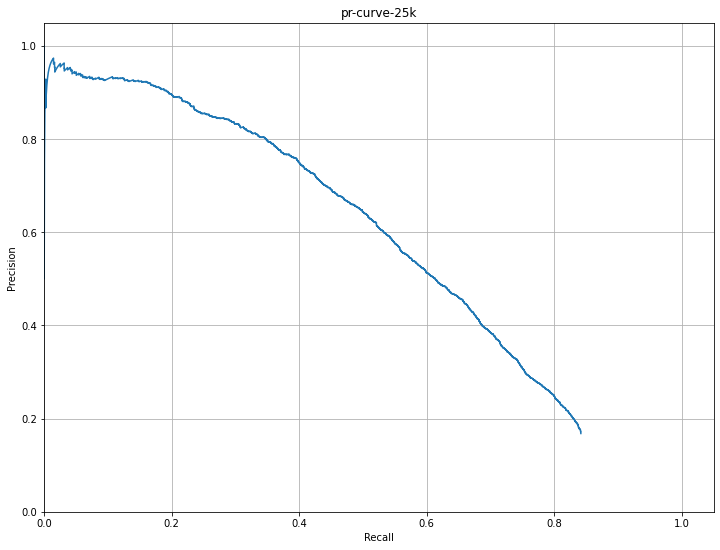

In [ ]:
generate_full_QueryEmbeddings(base_model)

[0, 3, 24, 25, 53, 68, 75, 76, 89, 112, 155, 164, 210, 212, 213, 249, 314, 343, 346, 350, 357, 358, 390, 407, 432, 440, 456, 465, 475, 499, 522, 561, 587, 596, 676, 677, 685, 690, 723, 751, 756, 762, 774, 790, 870, 872, 873, 877, 888, 896, 960, 963, 972, 995, 1017, 1021, 1048, 1059, 1072, 1073, 1092, 1099, 1128, 1161, 1172, 1217, 1218, 1219, 1222, 1236, 1244, 1266, 1277, 1279, 1283, 1306, 1307, 1321, 1339, 1360, 1368, 1369, 1373, 1385, 1389, 1473, 1499, 1524, 1526, 1532, 1534, 1544, 1556, 1557, 1558, 1588, 1593, 1611, 1645, 1652, 1659, 1669, 1680, 1690, 1720, 1854, 1902, 1913, 1929, 1940, 1953, 1971, 1977, 1982, 1991, 2007, 2017, 2027, 2076, 2097, 2098, 2100, 2101, 2106, 2147, 2154, 2167, 2203, 2213, 2245, 2259, 2270, 2328, 2332, 2337, 2346, 2349, 2357, 2423, 2455, 2478, 2497, 2528, 2546, 2574, 2591, 2646, 2660, 2673, 2695, 2702, 2720, 2726, 2748, 2818, 2826, 2878, 2887, 2888, 2946, 2984, 3019, 3048, 3049, 3059, 3060, 3069, 3074, 3084, 3087, 3090, 3099, 3102, 3116, 3130, 3154, 3170, 31

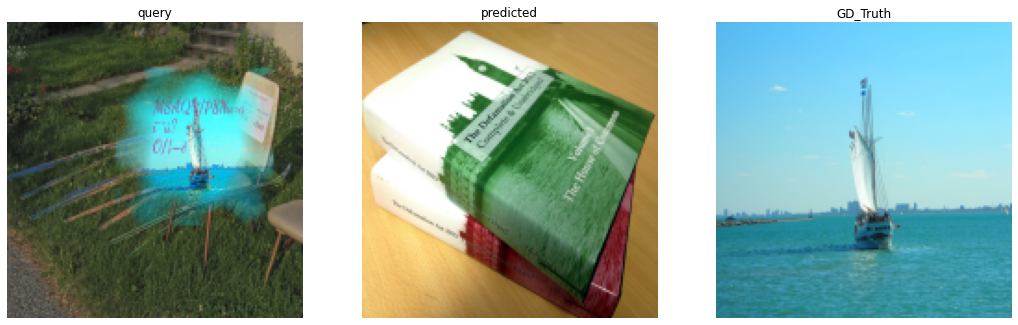

In [ ]:
#queryId1, negId1 = getHardNegList(I1)
print(queryId1)
print(negId1)
print("total negs:", len(negId1))
from loader.fb_image_gen_pre_tf import *
i =9 #queryid =889,1170 is impossible
examples = [read_image(Q_List[queryId1[i]]),read_image(R_List[negId1[i]]),read_image(R_List[queryId1[i]])]
plot_triplets(examples)

triplets


<Figure size 432x288 with 0 Axes>

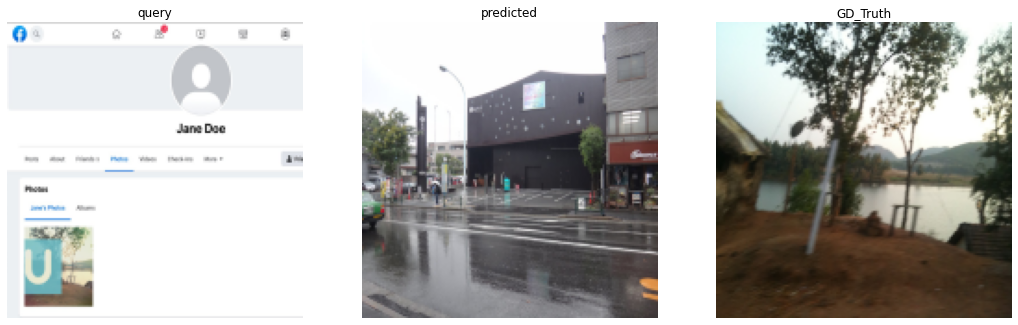

In [ ]:
i=3# good example showing too small size
plt.figure(2)
#plt.imshow(read_image(Q_List[queryId1[i]]))
print("triplets")
plot_triplets(examples)

[0, 3, 5, 25, 1236, 1514, 1652, 1940, 2100, 2154, 2270, 2328, 2818, 3253, 3319, 3460, 3516, 3673, 3846, 3981, 3989, 4292, 4374, 4494, 4533, 4620, 4820, 4941]
[2800, 4861, 164, 3786, 4317, 1170, 3500, 1783, 103, 1170, 4861, 1170, 3786, 103, 4265, 2800, 889, 1170, 103, 889, 2800, 3280, 680, 3811, 2817, 2574, 1170, 214]
total negs: 28


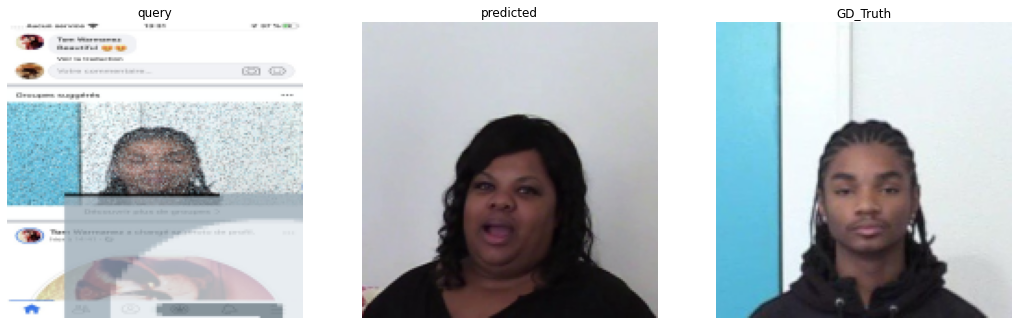

In [ ]:
#queryId1, negId1 = getHardNegList(I1)
print(queryId1)
print(negId1)
print("total negs:", len(negId1))
from loader.fb_image_gen_pre_tf import *
i =16 #queryid =889,1170,2270 is impossible
examples = [read_image(Q_List[queryId1[i]]),read_image(R_List[negId1[i]]),read_image(R_List[queryId1[i]])]
plot_triplets(examples)

In [ ]:
#save_models_weights("88R_59P")

saved model weights and copied to google drive


diff index =[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220

100%|██████████| 155/155 [00:57<00:00,  2.70it/s]


Time for generation 0.9569810271263123 mins
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:11<00:00,  2.18it/s]


Time for generation 1.1875553250312805 mins
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 98.50806451612904% : 
I[0:5 [[2178]
 [   1]
 [   2]
 [1415]
 [   4]]
D[0:5 [[0.5859426 ]
 [0.10414565]
 [0.12292159]
 [0.4334315 ]
 [0.13501823]]
  found 54878 images
Inference for generating embedding. THis will take long....


100%|██████████| 1097/1097 [02:23<00:00,  7.66it/s]


Time for generation 2.3863278150558473 mins
Writing embedding to file./data/embed/subset_refExtended_em_resnet50Reg.hdf5
  found 50000 images
Inference for generating embedding. THis will take long....


100%|██████████| 500/500 [01:02<00:00,  8.00it/s]


Time for generation 1.0411195278167724 mins
Writing embedding to file./data/embed/full_query_em_resnet50Reg.hdf5
*******Total no of correct predictions:  4783
ntp at 9=10, 49=49,99=99, 499=497, 999=996,
 4999=4209,7999=4527, 9999=4607,11999=4649
probas_pred at 9=-0.0032280683517456055, 49=-0.012580037117004395,99=-0.017617464065551758, 499=-0.037314653396606445, 999=-0.04969632625579834,
 4999=-0.19981980323791504,7999=-0.28198862075805664, 9999=-0.3180248737335205,11999=-0.3482184410095215
precision at p[99]=0.99, p[499]=0.994,p[999]=0.996, p[4999]=0.8418,p[9999]=0.4607
recall at r[99]=0.019835704267681827, r[499]=0.09957924263674614,r[999]=0.1995592065718293, r[4999]=0.8433179723502304,r[9999]=0.9230615107192948
Average Precision: 0.89173
Recall at P90    : 0.81146
Threshold at P90 : -0.17534
Recall at rank 1:  0.95832
Recall at rank 10: 0.95832
*******Total no of correct predictions:  4783
*******Total no of incorrect predictions:  20217
*************Suggested accuracy from metrics 

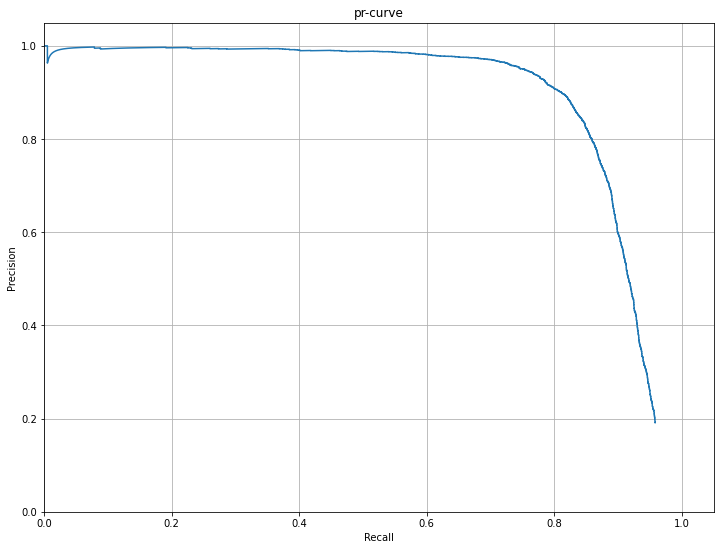

In [ ]:
Inew = combine_Is(Ioffline, Ihardbatch)
pickle.dump(Inew, open("./data/L2Index_2_prev.p", "wb"))
model.compile(loss=identity_loss, optimizer=Adam(1e-6))
model, base_model = test_hardOfflineBatch(model, base_model, epochs=500,batchsize=64)
#model.save_weights(modelFilePath+"complete_res50_offline.hdf5")
#base_model.save_weights(modelFilePath + "Embeddings_res50_off_1.hdf5")
Ioffline = findAccuracy(base_model)
generate_full_QueryEmbeddings(base_model=base_model)
save_models_weights("_offline1")

  found 4991 images
  found 4991 images
train_stop=  194
current date time:  30-09-2021_H20_M52
Starting HardOffline training process!
-------------------------------------
100/3000 -------------
[100] Time for 100 iterations: 3.2 mins, Train Loss: 0.10700976103544235
val_loss =  0.22466552
best loss found, previous: 1000, current: 0.22466552257537842 
curr best_val_index=  100
200/3000 -------------
[200] Time for 200 iterations: 6.5 mins, Train Loss: 0.1465877741575241
val_loss =  0.21161029
best loss found, previous: 0.22466552257537842, current: 0.21161028742790222 
curr best_val_index=  200
300/3000 -------------
[300] Time for 300 iterations: 9.7 mins, Train Loss: 0.14074960350990295
val_loss =  0.16091666
best loss found, previous: 0.21161028742790222, current: 0.16091665625572205 
curr best_val_index=  300
400/3000 -------------
[400] Time for 400 iterations: 12.9 mins, Train Loss: 0.11773823201656342
val_loss =  0.14855811
best loss found, previous: 0.16091665625572205, curren

100%|██████████| 155/155 [00:56<00:00,  2.72it/s]


Time for generation 0.9483186920483907 mins
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:11<00:00,  2.17it/s]


Time for generation 1.193259867032369 mins
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 97.76209677419355% : 
I[0:5 [[2047]
 [   1]
 [   2]
 [2270]
 [   4]]
D[0:5 [[0.41898155]
 [0.10258305]
 [0.1300534 ]
 [0.34765708]
 [0.14965999]]
  found 54878 images
Inference for generating embedding. THis will take long....


100%|██████████| 1097/1097 [02:21<00:00,  7.77it/s]


Time for generation 2.3537535389264423 mins
Writing embedding to file./data/embed/subset_refExtended_em_resnet50Reg.hdf5
  found 50000 images
Inference for generating embedding. THis will take long....


100%|██████████| 1000/1000 [02:07<00:00,  7.82it/s]


Time for generation 2.1311434229214985 mins
Writing embedding to file./data/embed/full_query_em_resnet50Reg.hdf5
*******Total no of correct predictions:  4749
ntp at 9=10, 49=49,99=99, 499=497, 999=995,
 4999=4170,7999=4491, 9999=4566,11999=4619
probas_pred at 9=-0.003312230110168457, 49=-0.01287841796875,99=-0.0180056095123291, 499=-0.038443684577941895, 999=-0.051164984703063965,
 4999=-0.19736766815185547,7999=-0.27593719959259033, 9999=-0.3100402355194092,11999=-0.33981502056121826
precision at p[99]=0.99, p[499]=0.994,p[999]=0.995, p[4999]=0.834,p[9999]=0.4566
recall at r[99]=0.019835704267681827, r[499]=0.09957924263674614,r[999]=0.1993588459226608, r[4999]=0.8355039070326588,r[9999]=0.9148467241033861
Average Precision: 0.88171
Recall at P90    : 0.79463
Threshold at P90 : -0.171979
Recall at rank 1:  0.95151
Recall at rank 10: 0.95151
*******Total no of correct predictions:  4749
*******Total no of incorrect predictions:  20251
*************Suggested accuracy from metrics evalu

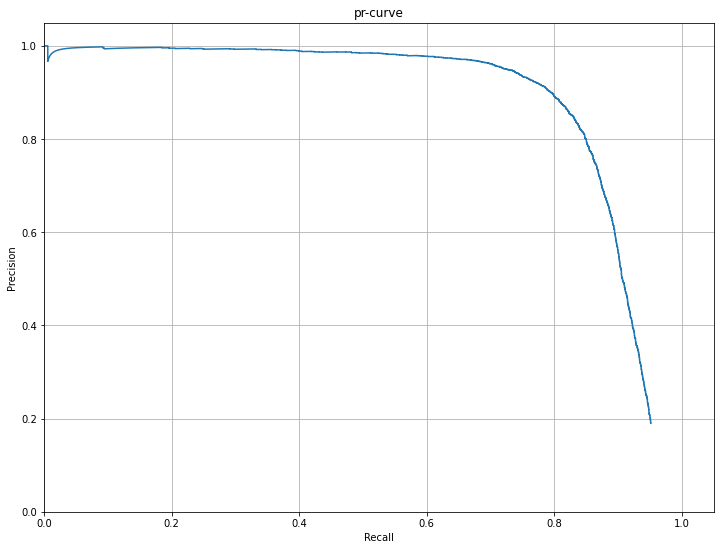

In [ ]:
model.compile(loss=identity_loss, optimizer=Adam(1e-6))
model, base_model = test_hardOfflineBatch(model, base_model, epochs=1000,batchsize=64)
#model.save_weights(modelFilePath+"complete_res50_offline.hdf5")
#base_model.save_weights(modelFilePath + "Embeddings_res50_off_1.hdf5")
Ioffline = findAccuracy(base_model)
generate_full_QueryEmbeddings(base_model=base_model)
save_models_weights("_offline1")

In [ ]:
#pickle.load(open("./L2Index_2_prev.p", "rb"))
#save it in filename that is read as hardocded by offline
#pickle.dump(Ioffline, open("L2Index_2_prev", "wb"))

In [ ]:
from settings import *
#from loader.fb_image_gen_pre_tf import *
#base_model = embedding_model()
#base_model.save_weights('models/weights/temp.hdf5')
model.compile(loss=identity_loss, optimizer=Adam(1e-5))
#base_model.save_weights('models/weights/temp.hdf5')
#base_model.load_weights('models/weights/temp.hdf5')
model, base_model = test_hardbatch(model, base_model, epochs=20,batchsize=20)#ep=35(recommended)
Ihardbatch = findAccuracy(base_model)
pickle.dump(Ihardbatch, open("./data/L2Index_2_prev.p", "wb"))
generate_full_QueryEmbeddings(base_model)
#save_models_weights("_online")


In [ ]:
model.compile(loss=identity_loss, optimizer=Adam(5e-6))
model, base_model = test_hardOfflineBatch(model, base_model, epochs=50,batchsize=64)
#model.save_weights(modelFilePath+"complete_res50_offline.hdf5")
#base_model.save_weights(modelFilePath + "Embeddings_res50_off_1.hdf5")
Ioffline = findAccuracy(base_model)
generate_full_QueryEmbeddings(base_model=base_model)
save_models_weights("_offline")

  found 4991 images
  found 4991 images
train_stop=  102
Starting HardOffline training process!
-------------------------------------
100/5000 -------------
[100] Time for 100 iterations: 1.4 mins, Train Loss: 0.8139911890029907
val_loss =  0.8438009
best loss found, previous: 1000, current: 0.8438009023666382 
curr best_val_index=  100
200/5000 -------------
[200] Time for 200 iterations: 2.8 mins, Train Loss: 1.027233362197876
val_loss =  0.8462084
best val loss=0.8438009023666382, at iter=100
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:07<00:00,  2.30it/s]


Time for generation 1.1239829063415527 mins
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:21<00:00,  1.89it/s]


Time for generation 1.364534040292104 mins
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 98.02419354838709% : 
I[0:5 [[1547]
 [   1]
 [   2]
 [3516]
 [   4]]
D[0:5 [[0.18766236]
 [0.0865047 ]
 [0.03128994]
 [0.0491488 ]
 [0.0714767 ]]
  found 54878 images
Inference for generating embedding. THis will take long....


100%|██████████| 1097/1097 [03:27<00:00,  5.29it/s]


Time for generation 3.4536869645118715 mins
Writing embedding to file./data/embed/subset_refExtended_em_resnet50Reg.hdf5
  found 50000 images
Inference for generating embedding. THis will take long....


100%|██████████| 1000/1000 [03:32<00:00,  4.70it/s]


Time for generation 3.5489093979199726 mins
Writing embedding to file./data/embed/full_query_em_resnet50Reg.hdf5
*******Total no of correct predictions:  4751
ntp at 9=10, 49=49,99=97, 499=484, 999=975,4999=4634,9999=4634
probas_pred at 9=-0.0032805204391479492, 49=-0.01036679744720459,99=-0.014831900596618652, 499=-0.0286252498626709, 999=-0.03740894794464111,4999=-0.32013440132141113,9999=-0.32013440132141113
precision at p[99]=0.97, p[499]=0.968,p[999]=0.975, p[4999]=0.8644,p[9999]=0.4634
recall at r[99]=0.01943498296934482, r[499]=0.0969745541975556,r[999]=0.19535163293929073, r[4999]=0.8659587257062713,r[9999]=0.9284712482468443
Average Precision: 0.89102
Recall at P90    : 0.85273
Threshold at P90 : -0.151055
Recall at rank 1:  0.95191
Recall at rank 10: 0.95191
*******Total no of correct predictions:  4751
*******Total no of incorrect predictions:  20249
*************Suggested accuracy from metrics evaluation************
Accuracy Score: 0.89168
Balanced Accuracy Score: 0.9154923

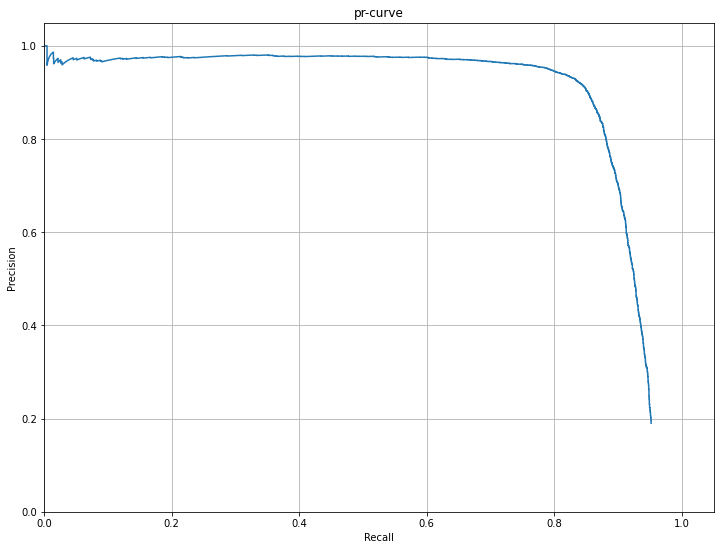

In [ ]:
from settings import *
model.compile(loss=identity_loss, optimizer=Adam(4e-7))
#pickle.dump(Ioffline, open("./data/L2Index_2_prev.p", "wb"))
model, base_model = test_hardOfflineBatch(model, base_model, epochs=1000,batchsize=20)
Ioffline = findAccuracy(base_model)
generate_full_QueryEmbeddings(base_model)
save_models_weights("_final")

In [ ]:
save_models_weights()

saved model weights and copied to google drive


In [ ]:
model.compile(loss=identity_loss, optimizer=Adam(1e-6))
model, base_model = test_hardbatch(model, base_model, epochs=30,batchsize=32)
Ihardbatch = findAccuracy(base_model)

model weights filepath name is:  ./models/weights/model_resnet50tf_EP30_18-09-2021_H19_M03.hdf5
Starting Semi-Hard Negative training process!
-------------------------------------
Inside: generate_triplets_hdfseq: total seq data= 4976, neg data= 54800
no semi hard found, going for the maximum loss: 
no semi hard found, going for the maximum loss: 
100/3720 -------------
[100] Time for 100 iterations: 3.3 mins, Train Loss: 0.010540260002017021
Inside: generate_triplets_hdfseq: total seq data= 4976, neg data= 54848
val_loss =  0.010104858027320475
best loss found, previous: 1000, current: 0.010104858027320475 
curr best_val_index=  100
no semi hard found, going for the maximum loss: 
200/3720 -------------
[200] Time for 200 iterations: 6.5 mins, Train Loss: 0.028383055701851845
val_loss =  0.01091107215935124
no semi hard found, going for the maximum loss: 
300/3720 -------------
[300] Time for 300 iterations: 9.5 mins, Train Loss: 0.028481725603342056
val_loss =  0.010554860472761756
n

100%|██████████| 155/155 [01:07<00:00,  2.29it/s]


Time for generation 1.1278113802274068 mins
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:25<00:00,  1.81it/s]


Time for generation 1.4239691495895386 mins
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 91.53225806451613% : 
I[0:10 [[4265]
 [   1]
 [   2]
 [4601]
 [   4]
 [3846]
 [   6]
 [   7]
 [   8]
 [   9]]
D[0:10 [[0.04407942]
 [0.39232326]
 [0.28685176]
 [0.01804185]
 [0.32137644]
 [0.01851201]
 [0.2870798 ]
 [0.25143027]
 [0.3023138 ]
 [0.16035903]]


train_stop=  313
Starting HardOffline training process!
-------------------------------------
100/800 -------------
[100] Time for 100 iterations: 4.1 mins, Train Loss: 0.7796737551689148
val_loss =  0.9788098
best loss found, previous: 1000, current: 0.9788097739219666 
curr best_val_index=  100
200/800 -------------
[200] Time for 200 iterations: 8.2 mins, Train Loss: 0.6883440613746643
val_loss =  0.8793571
best loss found, previous: 0.9788097739219666, current: 0.879357099533081 
curr best_val_index=  200
300/800 -------------
[300] Time for 300 iterations: 12.2 mins, Train Loss: 0.6741547584533691
val_loss =  0.757611
best loss found, previous: 0.879357099533081, current: 0.7576109766960144 
curr best_val_index=  300
400/800 -------------
[400] Time for 400 iterations: 16.3 mins, Train Loss: 0.5261223316192627
val_loss =  0.5904502
best loss found, previous: 0.7576109766960144, current: 0.5904502272605896 
curr best_val_index=  400
500/800 -------------
[500] Time for 500 iteratio

100%|██████████| 155/155 [01:08<00:00,  2.27it/s]


Time for generation 1.1370920419692994 mins
skipping writing embeddings to file
Inference for generating embedding. THis will take long....


100%|██████████| 155/155 [01:23<00:00,  1.86it/s]


Time for generation 1.3909178098042807 mins
skipping writing embeddings to file
matching index after training....
Top K=1 matchign accuracy 97.19758064516128% : 
I[0:10 [[4265]
 [   1]
 [   2]
 [1415]
 [   4]
 [2270]
 [   6]
 [   7]
 [   8]
 [   9]]
D[0:10 [[0.32987583]
 [0.10146284]
 [0.06559181]
 [0.1302607 ]
 [0.13031459]
 [0.05911767]
 [0.17147458]
 [0.10587513]
 [0.09113872]
 [0.05688286]]
  found 54878 images
Inference for generating embedding. THis will take long....


100%|██████████| 1097/1097 [03:35<00:00,  5.09it/s]


Time for generation 3.588854134082794 mins
Writing embedding to file./data/embed/subset_refExtended_em_resnet50Reg.hdf5
  found 50000 images
Inference for generating embedding. THis will take long....


100%|██████████| 1000/1000 [03:11<00:00,  5.22it/s]


Time for generation 3.1958722631136576 mins
Writing embedding to file./data/embed/full_query_em_resnet50Reg.hdf5
*******Total no of correct predictions:  4701
ntp at 9=9, 49=49,99=99, 499=490, 999=975,4999=4580,9999=4580
probas_pred at 9=-0.0034099817276000977, 49=-0.010561108589172363,99=-0.016254186630249023, 499=-0.03421342372894287, 999=-0.04616427421569824,4999=-0.33088529109954834,9999=-0.33088529109954834
precision at p[99]=0.99, p[499]=0.98,p[999]=0.975, p[4999]=0.8362,p[9999]=0.458
recall at r[99]=0.019835704267681827, r[499]=0.09817671809256662,r[999]=0.19535163293929073, r[4999]=0.8377078741735123,r[9999]=0.9176517731917452
Average Precision: 0.86359
Recall at P90    : 0.78481
Threshold at P90 : -0.14367
Recall at rank 1:  0.94190
Recall at rank 10: 0.94190
*******Total no of correct predictions:  4701
*******Total no of incorrect predictions:  20299
*************Suggested accuracy from metrics evaluation************
Accuracy Score: 0.87468
Balanced Accuracy Score: 0.9046032

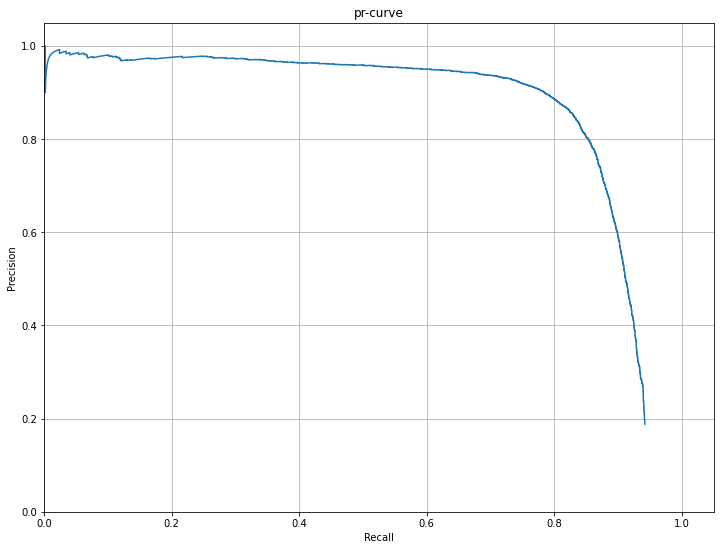

In [ ]:
#baseline to compare
#model.compile(loss=identity_loss, optimizer=Adam(1e-5))
#model, base_model = test_hardOfflineBatch(model, base_model, epochs=200,batchsize=64)
#model.save_weights(modelFilePath+"complete_res50_offline.hdf5")
#base_model.save_weights(modelFilePath + "Embeddings_res50_off_1.hdf5")
#Ioffline = findAccuracy(base_model)
#generate_full_QueryEmbeddings(base_model=base_model)

In [ ]:

model.save_weights(modelFilePath +get_model_name()+ "complete.hdf5")
base_model.save_weights(modelFilePath + get_model_name()+"base.hdf5")
!cp ./models/weights/*.hdf5 /content/drive/MyDrive/collab_drive/model_artifacts-dev-tf

In [ ]:
#!cp /content/models/*.py /content/drive/MyDrive/collab_drive/isc2021/models/
#!cp /content/loader/*.py /content/drive/MyDrive/collab_drive/isc2021/loader/
#!cp /content/*.ipynb /content/drive/MyDrive/collab_drive/isc2021/